<a href="https://colab.research.google.com/github/mindjobs/Ecerlab/blob/main/Cristian_Vargas_NO_USAR_Copia_de_Laboratorio_1_Analisis_Datos_editJJT_Version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LABORATORIO 1: EDA y Pipeline Reproducible con datos clínicos oncológicos (cBioPortal)

Integrantes:
- Cristian Vargas
- Claudio Ballerini
- Christian Vásquez
- Juan José Torres

Replicar el enfoque del tutorial visto en clase con datos de cBioPortal, pero sobre un nuevo set
clínico oncológico elegido por tu equipo. El objetivo es evaluar la calidad/estructura del dataset,
construir un pipeline reproducible y documentar el flujo de trabajo con buenas prácticas.
Trabajo en grupo.

## Introducción y Configuración del Entorno

In [8]:
#!pip install pandas

import pandas as pd

from google.colab import files
uploaded = files.upload()

# Leer el archivo delimitado por tabulaciones en un DataFrame
df = pd.read_csv(list(uploaded.keys())[0], delimiter='\t')
display(df.head())

Saving prostate_msk_2024_clinical_data.tsv to prostate_msk_2024_clinical_data (1).tsv


,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,Current Age,Ethnicity,Fraction Genome Altered,Gene Panel,"Gleason Score, 1st Reported",...,Progression Free Survival Status (months),Progression Free Survival Status,Race,Number of Samples Per Patient,Sample coverage,Sample Type,Somatic Status,Stage,TMB (nonsynonymous),Tumor Purity
0,prostate_msk_2024,P-0000140,P-0000140-T01-IM3,Prostate Cancer,Prostate Neuroendocrine Carcinoma,45.0,Non-Spanish; Non-Hispanic,0.5462,IMPACT341,8.0,...,NaN,NaN,WHITE,1,629,Metastasis,Matched,Stage 4,1.109.155.301,60.0
1,prostate_msk_2024,P-0000197,P-0000197-T01-IM3,Prostate Cancer,Prostate Adenocarcinoma,80.0,Non-Spanish; Non-Hispanic,0.0604,IMPACT341,NaN,...,NaN,NaN,WHITE,1,1188,Metastasis,Matched,Stage 4,3.327.465.902,30.0
2,prostate_msk_2024,P-0000318,P-0000318-T01-IM3,Prostate Cancer,Prostate Adenocarcinoma,67.0,Non-Spanish; Non-Hispanic,0.5589,IMPACT341,10.0,...,NaN,NaN,PATIENT REFUSED TO ANSWER,1,782,Metastasis,Matched,Stage 4,3.327.465.902,60.0
3,prostate_msk_2024,P-0000373,P-0000373-T01-IM3,Prostate Cancer,Prostate Adenocarcinoma,58.0,Non-Spanish; Non-Hispanic,0.0023,IMPACT341,9.0,...,NaN,NaN,WHITE,1,708,Metastasis,Matched,Stage 4,1.109.155.301,60.0
4,prostate_msk_2024,P-0000377,P-0000377-T03-IM3,Prostate Cancer,Prostate Adenocarcinoma,64.0,Non-Spanish; Non-Hispanic,0.4249,IMPACT341,9.0,...,NaN,NaN,WHITE,1,805,Primary,Matched,Stage 4,9.982.397.705,80.0


# Diccionario de Datos

| Column Name                          | Description                                                                                                                                                                                                                            | Ejemplos                                                                 |
|--------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------|
| Study ID                             | Identificador del estudio. Todos los registros parecen pertenecer al mismo estudio.                                                                                                                                                    | prostate_msk_2024                                                        |
| Patient ID                           | Identificador único de cada paciente.                                                                                                                                                                                                  | P-0000140, P-0000197, P-0000318                                         |
| Sample ID                            | Identificador único de cada muestra de tejido tomada de un paciente.                                                                                                                                                                    | P-0000140-T01-IM3, P-0000197-T01-IM3, P-0000318-T01-IM3                  |
| Cancer Type                          | Tipo general de cáncer del paciente.                                                                                                                                                                                                   | Prostate Cancer                                                          |
| Cancer Type Detailed                 | Una subcategorización más específica del tipo de cáncer.                                                                                                                                                                               | Prostate Neuroendocrine Carcinoma, Prostate Adenocarcinoma, Prostate Small Cell Carcinoma |
| Current Age                          | Edad actual del paciente en años.                                                                                                                                                                                                      | 45, 80, 67                                                               |
| Ethnicity                            | Etnicidad declarada del paciente.                                                                                                                                                                                                      | Non-Spanish; Non-Hispanic, Spanish  NOS; Hispanic NOS, Latino NOS, Unknown whether Spanish or not |
| Fraction Genome Altered              | Fracción del genoma que ha sido alterada. Es un valor numérico.                                                                                                                                                                        | 0.5462, 0.0604, 0.5589                                                   |
| Gene Panel                           | Tipo de panel de genes utilizado para la secuenciación.                                                                                                                                                                                | IMPACT341, IMPACT410, IMPACT468, IMPACT505                               |
| Gleason Score, 1st Reported          | Puntuación de Gleason reportada por primera vez. Puede ser 'NA' si no está disponible.                                                                                                                                               | 8, NA, 10, 9                                                             |
| Gleason Score, Highest Reported      | La puntuación de Gleason más alta reportada. Puede ser 'NA' si no está disponible.                                                                                                                                                   | 9, NA, 10, 8                                                             |
| MSI Score                            | Puntuación de inestabilidad de microsatélites (MSI). Un valor numérico que indica el grado de inestabilidad, un factor clave en la respuesta a la inmunoterapia.                                                                     | 0.67, 0.09, 1.67                                                         |
| MSI Type                             | Clasificación de la inestabilidad de microsatélites (MSI), que el estudio asocia con una respuesta más pronunciada y duradera a la inmunoterapia (ICB). Los valores 'Stable' (estable) o 'Instable' (inestable) son cruciales para determinar la estrategia de tratamiento. | Stable, Instable, Indeterminate                                          |
| Mutation Count                       | Número total de mutaciones encontradas. Es un valor entero.                                                                                                                                                                            | 1, 3, NA                                                                 |
| Oncotree Code                        | Código de la clasificación Oncotree para el tipo de cáncer.                                                                                                                                                                          | PRNE, PRAD, PRSCC                                                        |
| Overall Survival (Months)            | Supervivencia general en meses. Es un valor numérico.                                                                                                                                                                                  | 0.32876352, 4.66844199, 1.315054082                                      |
| Overall Survival Status              | Estado de supervivencia del paciente.                                                                                                                                                                                                 | 1:DECEASED, 0:LIVING                                                     |
| Progression Free Survival Status (months) | Estado de supervivencia libre de progresión en meses. Puede ser 'NA' si no está disponible.                                                                                                                                           | NA, 41.97368421, 7.335526316                                              |
| Progression Free Survival Status     | Estado de supervivencia libre de progresión del paciente.                                                                                                                                                                             | NA, 0:DiseaseFree, 1:Recurred/Progressed                                 |
| Race                                 | Raza declarada del paciente.                                                                                                                                                                                                         | WHITE, PATIENT REFUSED TO ANSWER, BLACK OR AFRICAN AMERICAN, ASIAN-FAR EAST/INDIAN SUBCONT |
| Number of Samples Per Patient        | Número de muestras de tejido por paciente.                                                                                                                                                                                             | 1, 2                                                                     |
| Sample coverage                      | Cobertura de la muestra. Es un valor numérico.                                                                                                                                                                                         | 629, 1188, 782                                                           |
| Sample Type                          | Tipo de muestra de tejido.                                                                                                                                                                                                           | Metastasis, Primary                                                      |
| Somatic Status                       | Estado de la muestra somática.                                                                                                                                                                                                         | Matched, Unmatched                                                       |
| Stage                                | Estadio del cáncer del paciente.                                                                                                                                                                                                     | Stage 4, Stage 1-3, Unknown                                              |
| TMB (nonsynonymous)                  | Carga mutacional del tumor (TMB), que según el estudio es mayor en los cánceres MSI-H/dMMR y está directamente relacionada con la respuesta favorable a la inmunoterapia (ICB).                                                           | 1.109155301, 3.327465902, 0                                              |
| Tumor Purity                         | Estimación de la pureza del tumor. Es un valor numérico.                                                                                                                                                                               | 60, 30, 80                                                               |

# Tarea
Realizar una auditoría de calidad de datos sobre el DataFrame df leído desde el archivo delimitado por tabulaciones "prostate_msk_2024_clinical_data.tsv".
La auditoría debe incluir:

* Verificación de valores nulos
* Detección de filas duplicadas
* Revisión de tipos de datos
* Estadísticas descriptivas
* Conteo de valores únicos
* Visualizaciones de problemas de calidad de datos
* Finalmente, se debe generar un informe que resuma los hallazgos.

## Verificar valores faltantes

### Subtarea:
Contar el número de valores faltantes en cada columna.


**Razonamiento**:
Calcular y mostrar el número de valores faltantes por columna.



In [9]:
# Contar los valores faltantes en cada columna
missing_values = df.isnull().sum()
print(missing_values)

Study ID                                        0
Patient ID                                      0
Sample ID                                       0
Cancer Type                                     0
Cancer Type Detailed                            0
Current Age                                     1
Ethnicity                                       1
Fraction Genome Altered                         7
Gene Panel                                      0
Gleason Score, 1st Reported                   218
Gleason Score, Highest Reported               218
MSI Score                                       9
MSI Type                                        9
Mutation Count                                136
Oncotree Code                                   0
Overall Survival (Months)                      56
Overall Survival Status                         1
Progression Free Survival Status (months)    2224
Progression Free Survival Status             2224
Race                                            1


## Verificar filas duplicadas

### Subtarea:
Identificar y contar filas duplicadas en el dataframe.


**Razonamiento**:
Identificar y contar las filas duplicadas en el DataFrame.



In [10]:
# Contar las filas duplicadas
duplicate_rows = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicate_rows}")

Número de filas duplicadas: 0


## Verificar tipos de datos

### Subtarea:
Verificar los tipos de datos de cada columna e identificar inconsistencias.


**Razonamiento**:
Mostrar los tipos de datos de cada columna para identificar inconsistencias.



In [ ]:
# Mostrar los tipos de datos de cada columna
print(df.dtypes)

## Generar estadísticas descriptivas

### Subtarea:
Calcular estadísticas descriptivas para columnas numéricas y categóricas para comprender la distribución de los datos y posibles valores atípicos.


**Razonamiento**:
Generar y mostrar estadísticas descriptivas tanto para columnas numéricas como categóricas, con el fin de comprender la distribución de los datos y detectar posibles outliers.



In [11]:
# Generar y mostrar estadísticas descriptivas para columnas numéricas
print("Estadísticas Descriptivas para Columnas Numéricas:")
display(df.describe())

# Generar y mostrar estadísticas descriptivas para columnas categóricas
print("\nEstadísticas Descriptivas para Columnas Categóricas:")
display(df.describe(include='object'))

Estadísticas Descriptivas para Columnas Numéricas:


,Current Age,Fraction Genome Altered,"Gleason Score, 1st Reported","Gleason Score, Highest Reported",MSI Score,Mutation Count,Number of Samples Per Patient,Sample coverage,Tumor Purity
count,2259.000000,2253.000000,2042.000000,2042.000000,2251.000000,2124.000000,2260.000000,2260.000000,2244.000000
mean,70.910137,0.156859,7.997551,8.141038,1.037894,5.097928,1.002655,593.628319,40.002674
std,8.911999,0.155423,0.982699,0.917301,3.724249,15.899852,0.051468,216.858352,19.598238
min,40.000000,0.000000,6.000000,6.000000,-1.000000,1.000000,1.000000,102.000000,10.000000
25%,65.000000,0.031700,7.000000,7.000000,0.000000,2.000000,1.000000,454.750000,25.000000
50%,71.000000,0.114000,8.000000,8.000000,0.180000,3.000000,1.000000,589.000000,40.000000
75%,77.000000,0.230900,9.000000,9.000000,0.660000,4.000000,1.000000,716.250000,50.000000
max,89.000000,0.796500,10.000000,10.000000,41.110000,539.000000,2.000000,2148.000000,95.000000



Estadísticas Descriptivas para Columnas Categóricas:


,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,Ethnicity,Gene Panel,MSI Type,Oncotree Code,Overall Survival (Months),Overall Survival Status,Progression Free Survival Status (months),Progression Free Survival Status,Race,Sample Type,Somatic Status,Stage,TMB (nonsynonymous)
count,2260,2260,2260,2260,2260,2259,2260,2251,2260,2204,2259,36,36,2259,2260,2260,2259,2260
unique,1,2257,2260,1,4,10,4,4,4,1424,2,33,2,8,4,2,3,107
top,prostate_msk_2024,P-0019199,P-0062933-T01-IM7,Prostate Cancer,Prostate Adenocarcinoma,Non-Spanish; Non-Hispanic,IMPACT468,Stable,PRAD,1.808.199.362,0:LIVING,4.197.368.421,1:Recurred/Progressed,WHITE,Primary,Matched,Stage 4,172.939.619
freq,2260,2,1,2260,2234,2017,1477,2148,2234,10,1341,2,19,1865,1441,2255,1026,309


## Identificar valores únicos

### Subtarea:
Enumerar los valores únicos en columnas categóricas para verificar inconsistencias o variaciones.


**Razonamiento**:
Recorrer cada columna, verificar si su tipo de dato es object y, en ese caso, mostrar los valores únicos.



In [12]:
# Iterar a través de cada columna, verificar si es de tipo 'object' (categórica) e imprimir los valores únicos
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Valores únicos para la columna '{col}':")
    print(df[col].unique())
    print("-" * 30)

Valores únicos para la columna 'Study ID':
['prostate_msk_2024']
------------------------------
Valores únicos para la columna 'Patient ID':
['P-0000140' 'P-0000197' 'P-0000318' ... 'P-0062873' 'P-0062920'
 'P-0062933']
------------------------------
Valores únicos para la columna 'Sample ID':
['P-0000140-T01-IM3' 'P-0000197-T01-IM3' 'P-0000318-T01-IM3' ...
 'P-0062873-T01-IM7' 'P-0062920-T01-IM7' 'P-0062933-T01-IM7']
------------------------------
Valores únicos para la columna 'Cancer Type':
['Prostate Cancer']
------------------------------
Valores únicos para la columna 'Cancer Type Detailed':
['Prostate Neuroendocrine Carcinoma' 'Prostate Adenocarcinoma'
 'Prostate Small Cell Carcinoma' 'Prostate Squamous Cell Carcinoma']
------------------------------
Valores únicos para la columna 'Ethnicity':
['Non-Spanish; Non-Hispanic' 'Spanish  NOS; Hispanic NOS, Latino NOS'
 'Unknown whether Spanish or not' 'Dominican Republic'
 'South/Central America (except Brazil)' 'Puerto Rican'
 'Mexic

## Visualizar problemas de calidad de datos

### Subtarea:
Crear visualizaciones para representar valores faltantes, valores atípicos u otros problemas de calidad de datos.


**Razonamiento**:
Crear un mapa de calor para visualizar los outliers y boxplots para columnas numéricas seleccionadas, con el fin de observar la distribución de los datos y detectar posibles outliers, según lo solicitado en la subtarea.



In [13]:
!pip install seaborn

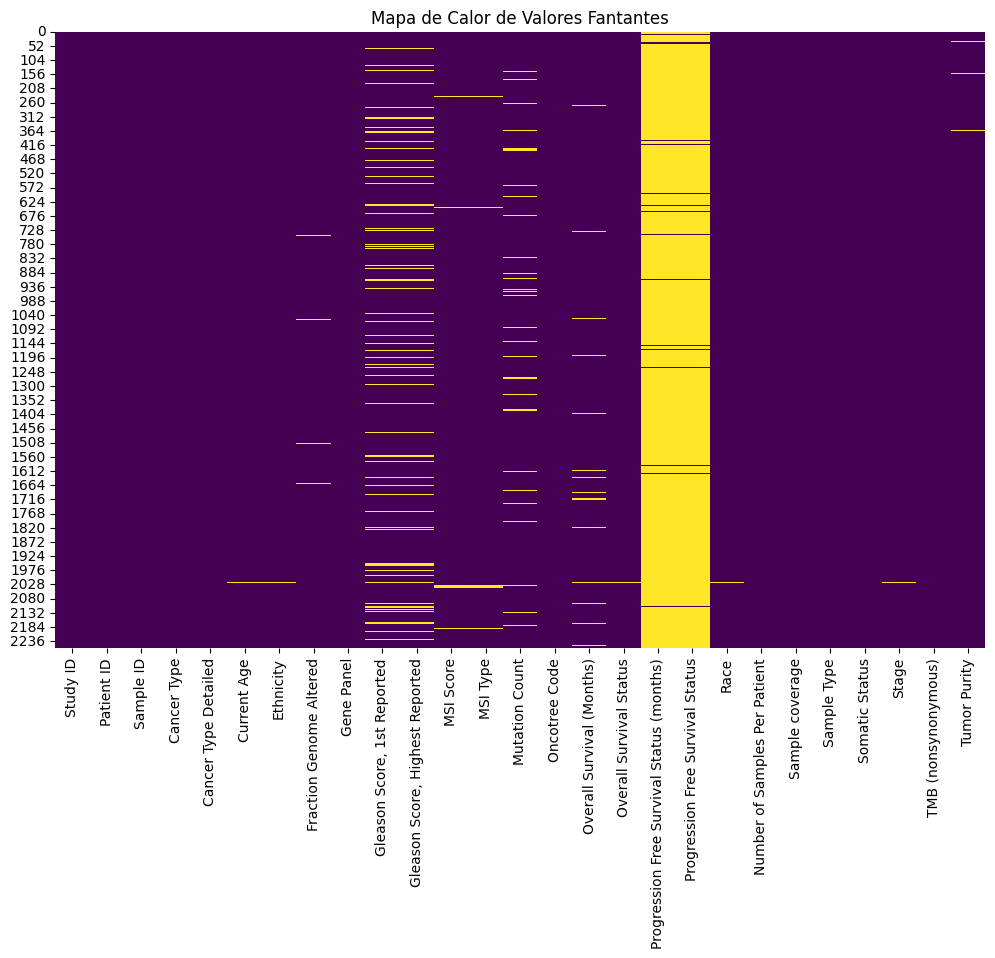

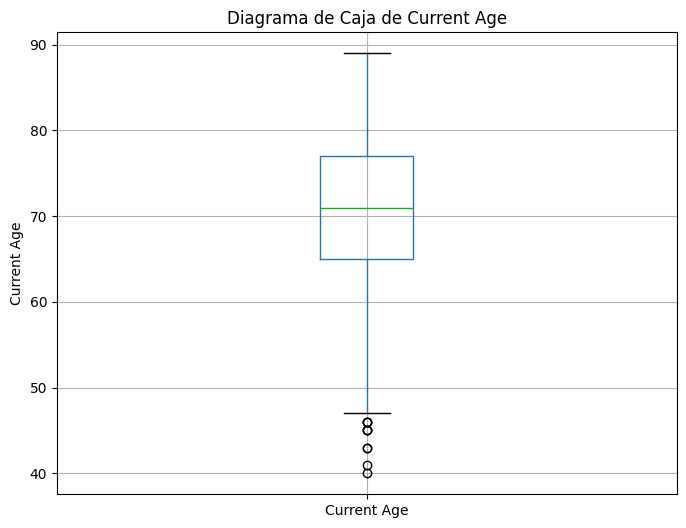

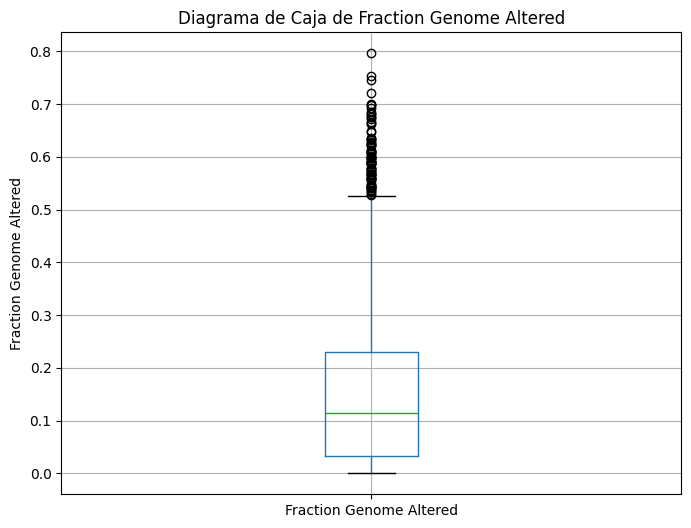

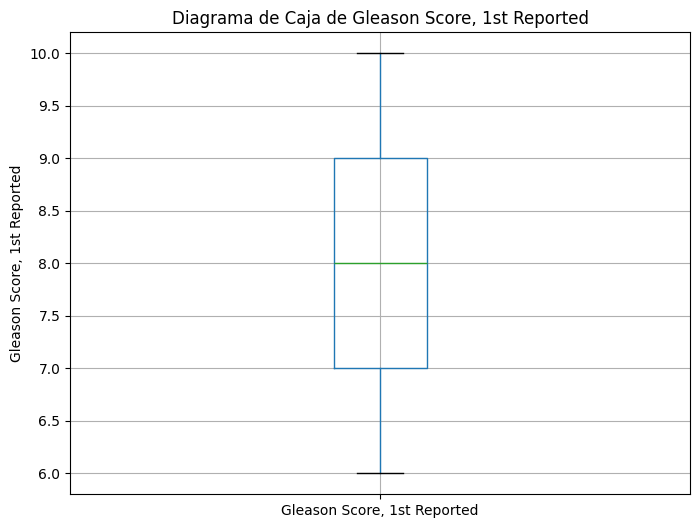

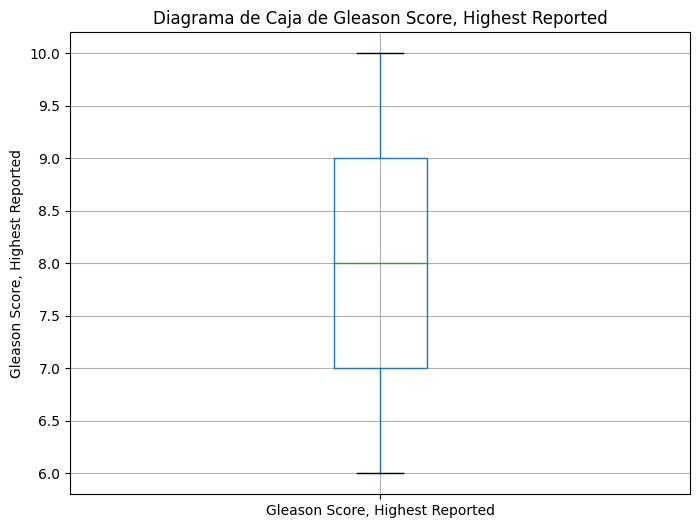

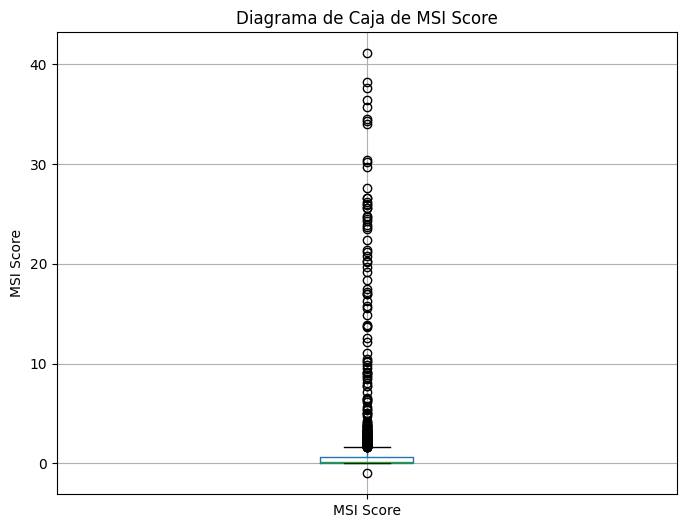

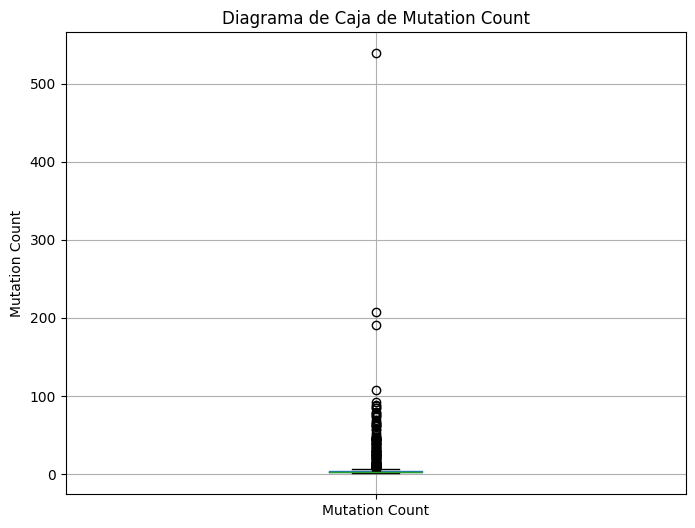

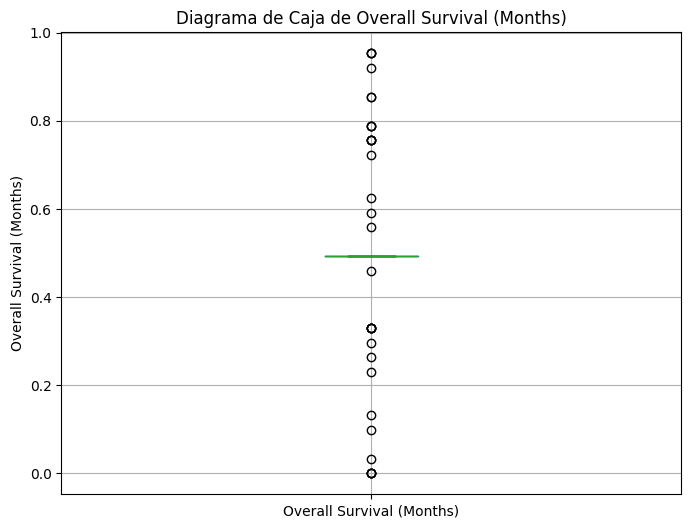

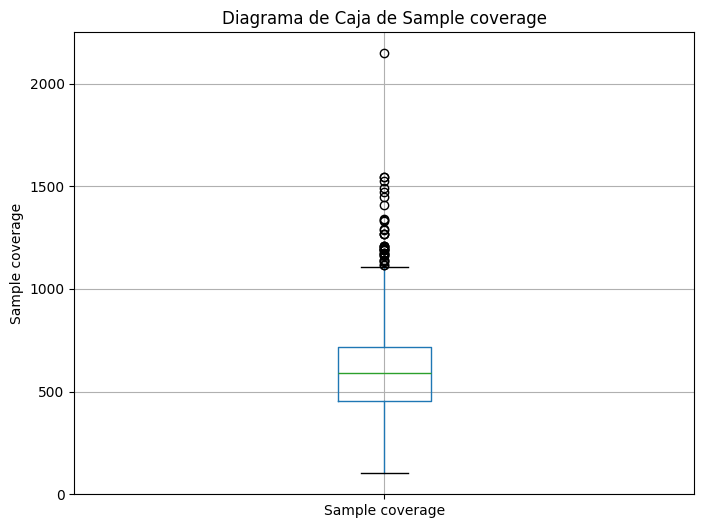

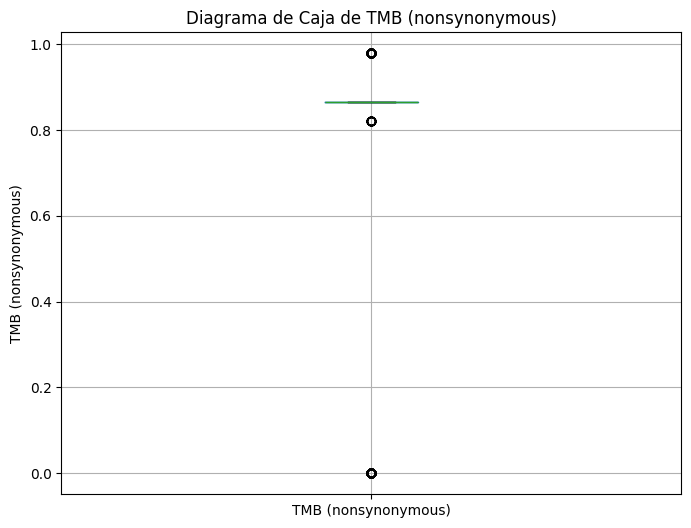

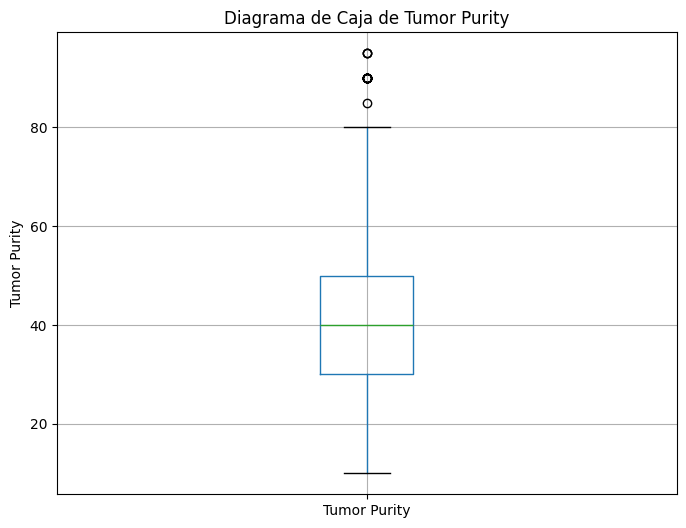

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor de valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de Calor de Valores Fantantes")
plt.show()

# Seleccionar columnas numéricas para diagramas de caja basadas en la salida de describe() y el interés potencial
numerical_cols_for_boxplot = [
    'Current Age',
    'Fraction Genome Altered',
    'Gleason Score, 1st Reported',
    'Gleason Score, Highest Reported',
    'MSI Score',
    'Mutation Count',
    'Overall Survival (Months)',
    'Sample coverage',
    'TMB (nonsynonymous)',
    'Tumor Purity'
]

# Crear diagramas de caja para las columnas numéricas seleccionadas
for col in numerical_cols_for_boxplot:
    plt.figure(figsize=(8, 6))
    df_final.boxplot(column=col)
    plt.title(f"Diagrama de Caja de {col}")
    plt.ylabel(col)
    plt.show()

## Generación de informe

### Subtarea:
Resumir los hallazgos de la auditoría de calidad de datos en un informe.


**Razonamiento**:
Crear un informe en formato Markdown que resuma los hallazgos clave de los pasos previos de la auditoría de calidad de datos.



In [15]:
# Generar el informe de auditoría de calidad de datos en formato markdown
report = """
# Informe de Auditoría de Calidad de Datos para el DataFrame `df`

Este informe resume los hallazgos de una auditoría de calidad de datos realizada en el DataFrame `df`.

## 1. Valores Faltantes

Se identificó un número significativo de valores faltantes en varias columnas. El recuento de valores faltantes por columna es el siguiente:
{}

La visualización del mapa de calor ilustró aún más la distribución de estos valores faltantes, mostrando qué columnas tienen la mayor proporción de datos faltantes y si hay algún patrón en la falta de datos. Columnas como 'Progression Free Survival Status (months)' y 'Progression Free Survival Status' tienen un número muy alto de valores faltantes.

## 2. Filas Duplicadas

No se encontraron filas duplicadas en el DataFrame. El recuento de filas duplicadas es: {}

## 3. Tipos de Datos

Los tipos de datos para cada columna parecen ser apropiados para su contenido. Los tipos de datos son los siguientes:
{}

No se identificaron inconsistencias obvias en los tipos de datos basándose en los nombres de las columnas.

## 4. Estadísticas Descriptivas

Las estadísticas descriptivas para las columnas numéricas proporcionaron información sobre la tendencia central, la dispersión y los posibles valores atípicos. Por ejemplo, 'Mutation Count' y 'TMB (nonsynonymous)' muestran un amplio rango de valores y posibles valores atípicos.

Las estadísticas descriptivas para las columnas categóricas destacaron el número de valores únicos y la frecuencia de las categorías más comunes. Columnas como 'Study ID' y 'Cancer Type' tienen muy pocos valores únicos, mientras que las columnas de identificador tienen muchos.

## 5. Valores Únicos

La enumeración de valores únicos en las columnas categóricas reveló las categorías distintas presentes. Este paso confirmó la presencia de valores faltantes (representados como `nan`) en varias columnas categóricas como 'Ethnicity', 'Overall Survival Status' y 'Race'. También se observaron variaciones en el formato de cadena en algunas columnas como 'Race' y 'Ethnicity'.

## 6. Visualizaciones

El mapa de calor de valores faltantes confirmó visualmente las columnas con la mayor cantidad de datos faltantes. Los diagramas de caja para las columnas numéricas seleccionadas ayudaron a visualizar la distribución de los datos e identificar posibles valores atípicos, particularmente en columnas relacionadas con la mutación y la carga tumoral.

## Conclusión

La auditoría de calidad de datos identificó datos faltantes significativos en varias columnas, variaciones en el formato de cadena en algunas columnas categóricas y posibles valores atípicos en características numéricas. No se encontraron filas duplicadas. Estos hallazgos destacan áreas que pueden requerir una limpieza y preprocesamiento adicionales antes de utilizar los datos para análisis o modelado.
""".format(df.isnull().sum().to_string(), df.duplicated().sum(), df.dtypes.to_string())

print(report)


# Informe de Auditoría de Calidad de Datos para el DataFrame `df`

Este informe resume los hallazgos de una auditoría de calidad de datos realizada en el DataFrame `df`.

## 1. Valores Faltantes

Se identificó un número significativo de valores faltantes en varias columnas. El recuento de valores faltantes por columna es el siguiente:
Study ID                                        0
Patient ID                                      0
Sample ID                                       0
Cancer Type                                     0
Cancer Type Detailed                            0
Current Age                                     1
Ethnicity                                       1
Fraction Genome Altered                         7
Gene Panel                                      0
Gleason Score, 1st Reported                   218
Gleason Score, Highest Reported               218
MSI Score                                       9
MSI Type                                        9
Mutation Cou

## Resumen:

### Hallazgos Clave del Análisis de Datos

* Se encontró un número significativo de valores faltantes en varias columnas, con 'Progression Free Survival Status (months)' y 'Progression Free Survival Status' teniendo un recuento muy alto.
* No se identificaron filas duplicadas en el conjunto de datos.
* Los tipos de datos asignados a cada columna parecen apropiados para su contenido.
* Las estadísticas descriptivas revelaron un amplio rango de valores y posibles valores atípicos en columnas numéricas como 'Mutation Count' y 'TMB (nonsynonymous)'.
* El análisis de valores únicos en columnas categóricas confirmó la presencia de valores faltantes (`nan`) y destacó variaciones en el formato de cadena en columnas como 'Race' y 'Ethnicity'.
* Las visualizaciones (mapa de calor y diagramas de caja) respaldaron visualmente los hallazgos relacionados con la distribución de valores faltantes y posibles valores atípicos en las características numéricas.

### Ideas o Próximos Pasos

* Abordar la cantidad significativa de datos faltantes en columnas como 'Progression Free Survival Status (months)' y 'Progression Free Survival Status' mediante imputación o considerando su impacto en análisis posteriores.
* Estandarizar el formato de cadena en columnas categóricas como 'Race' y 'Ethnicity' para asegurar la consistencia en el análisis.

## Análisis de Outliers

### Subtarea:
Identificar y contar outliers en columnas numéricas usando el método del rango intercuartílico (IQR).

**Razonamiento**:
Recorrer las columnas numéricas, calcular el rango intercuartílico (IQR) e identificar los outliers utilizando el método del IQR. Mostrar el conteo de outliers para cada columna numérica.

In [16]:
# Identificar columnas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Analizar y contar outliers para cada columna numérica
print("Conteo de Outliers por Columna Numérica (método IQR):")
for col in numerical_cols:
    if col in ['Number of Samples Per Patient']: # Excluir columnas con rangos limitados donde IQR no es informativo
        continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"'{col}': {len(outliers)} outliers")

Conteo de Outliers por Columna Numérica (método IQR):
'Current Age': 10 outliers
'Fraction Genome Altered': 84 outliers
'Gleason Score, 1st Reported': 0 outliers
'Gleason Score, Highest Reported': 0 outliers
'MSI Score': 201 outliers
'Mutation Count': 144 outliers
'Sample coverage': 38 outliers
'Tumor Purity': 20 outliers


## Top Columnas por % de Outliers (IQR 1.5x)

### Subtarea:
Calcular el porcentaje de outliers para cada columna numérica utilizando el método IQR (1.5x) e identificar las columnas con el mayor porcentaje.

**Razonamiento**:
Calcular el porcentaje de outliers para cada columna numérica, utilizando los conteos previamente identificados y el número total de filas. Luego, ordenar las columnas según el porcentaje de outliers en orden descendente y mostrar las columnas con mayor proporción.

In [17]:
# Calcular el porcentaje de outliers para cada columna numérica
outlier_percentages = {}
total_rows = len(df)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    if col in ['Number of Samples Per Patient']: # Excluir columnas con rangos limitados donde IQR no es informativo
        continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    percentage = (outlier_count / total_rows) * 100
    outlier_percentages[col] = percentage

# Ordenar las columnas por porcentaje de outliers en orden descendente
sorted_outliers = sorted(outlier_percentages.items(), key=lambda item: item[1], reverse=True)

# Mostrar las columnas con el porcentaje de outliers
print("Top Columnas por % de Outliers (IQR 1.5x):")
for col, percentage in sorted_outliers:
    print(f"'{col}': {percentage:.2f}%")

Top Columnas por % de Outliers (IQR 1.5x):
'MSI Score': 8.89%
'Mutation Count': 6.37%
'Fraction Genome Altered': 3.72%
'Sample coverage': 1.68%
'Tumor Purity': 0.88%
'Current Age': 0.44%
'Gleason Score, 1st Reported': 0.00%
'Gleason Score, Highest Reported': 0.00%


In [18]:
# Estadísticas de columnas numéricas
print("Estadísticas descriptivas para columnas numéricas:")
display(df.describe().T)

# Generar y mostrar estadísticas descriptivas para columnas categóricas
print("\nEstadísticas Descriptivas para Columnas Categóricas:")
display(df.describe(include='object'))

Estadísticas descriptivas para columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Current Age,2259.0,70.910137,8.911999,40.0,65.0000,71.000,77.0000,89.0000
Fraction Genome Altered,2253.0,0.156859,0.155423,0.0,0.0317,0.114,0.2309,0.7965
"Gleason Score, 1st Reported",2042.0,7.997551,0.982699,6.0,7.0000,8.000,9.0000,10.0000
"Gleason Score, Highest Reported",2042.0,8.141038,0.917301,6.0,7.0000,8.000,9.0000,10.0000
MSI Score,2251.0,1.037894,3.724249,-1.0,0.0000,0.180,0.6600,41.1100
Mutation Count,2124.0,5.097928,15.899852,1.0,2.0000,3.000,4.0000,539.0000
Number of Samples Per Patient,2260.0,1.002655,0.051468,1.0,1.0000,1.000,1.0000,2.0000
Sample coverage,2260.0,593.628319,216.858352,102.0,454.7500,589.000,716.2500,2148.0000
Tumor Purity,2244.0,40.002674,19.598238,10.0,25.0000,40.000,50.0000,95.0000



Estadísticas Descriptivas para Columnas Categóricas:


,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,Ethnicity,Gene Panel,MSI Type,Oncotree Code,Overall Survival (Months),Overall Survival Status,Progression Free Survival Status (months),Progression Free Survival Status,Race,Sample Type,Somatic Status,Stage,TMB (nonsynonymous)
count,2260,2260,2260,2260,2260,2259,2260,2251,2260,2204,2259,36,36,2259,2260,2260,2259,2260
unique,1,2257,2260,1,4,10,4,4,4,1424,2,33,2,8,4,2,3,107
top,prostate_msk_2024,P-0019199,P-0062933-T01-IM7,Prostate Cancer,Prostate Adenocarcinoma,Non-Spanish; Non-Hispanic,IMPACT468,Stable,PRAD,1.808.199.362,0:LIVING,4.197.368.421,1:Recurred/Progressed,WHITE,Primary,Matched,Stage 4,172.939.619
freq,2260,2,1,2260,2234,2017,1477,2148,2234,10,1341,2,19,1865,1441,2255,1026,309




### Lo más importante a medir

#### 1. Carga mutacional y estado de MSI
La *carga mutacional del tumor (TMB)* y la *inestabilidad de microsatélites (MSI)* son cruciales. El estudio demostró que los pacientes con cáncer de próstata MSI-H/dMMR tienen una mejor respuesta a la *inmunoterapia*. Medir estos marcadores ayuda a los oncólogos a determinar si un paciente es un buen candidato para este tipo de tratamiento, que aprovecha el sistema inmunitario del cuerpo para combatir el cáncer.

#### 2. Supervivencia
Los campos de *supervivencia* son indicadores directos del resultado clínico. Medir la *Supervivencia General (Overall Survival)* y la *Supervivencia Libre de Progresión (Progression Free Survival)* permite evaluar la eficacia de los tratamientos y entender el pronóstico de la enfermedad. Al analizar estos datos en relación con otros factores (como TMB y MSI), se pueden identificar subgrupos de pacientes con mejores o peores resultados.

#### 3. Tipo de cáncer y estado del genoma
El *tipo de cáncer detallado* y la *fracción del genoma alterada* son vitales para entender la naturaleza biológica del tumor. Estos datos pueden revelar si el cáncer es más agresivo, como el carcinoma neuroendocrino de próstata, y ayudan a clasificar a los pacientes con precisión. Por ejemplo, el estudio mostró que los pacientes con MSI-H a menudo tenían una enfermedad más agresiva.

---

### Por qué son importantes en conjunto

Al combinar la información sobre la *carga mutacional* y la *inestabilidad de microsatélites* con los datos de *supervivencia, los investigadores y médicos pueden construir un perfil completo de cada paciente. Esto permite la **medicina de precisión*, donde las decisiones de tratamiento se basan en las características moleculares del tumor, lo que lleva a terapias más efectivas y personalizadas.

# Laboratorio 2 EDA multivariado y modelos de regresión lineal

# Sección nueva


Generando Pair Plot...


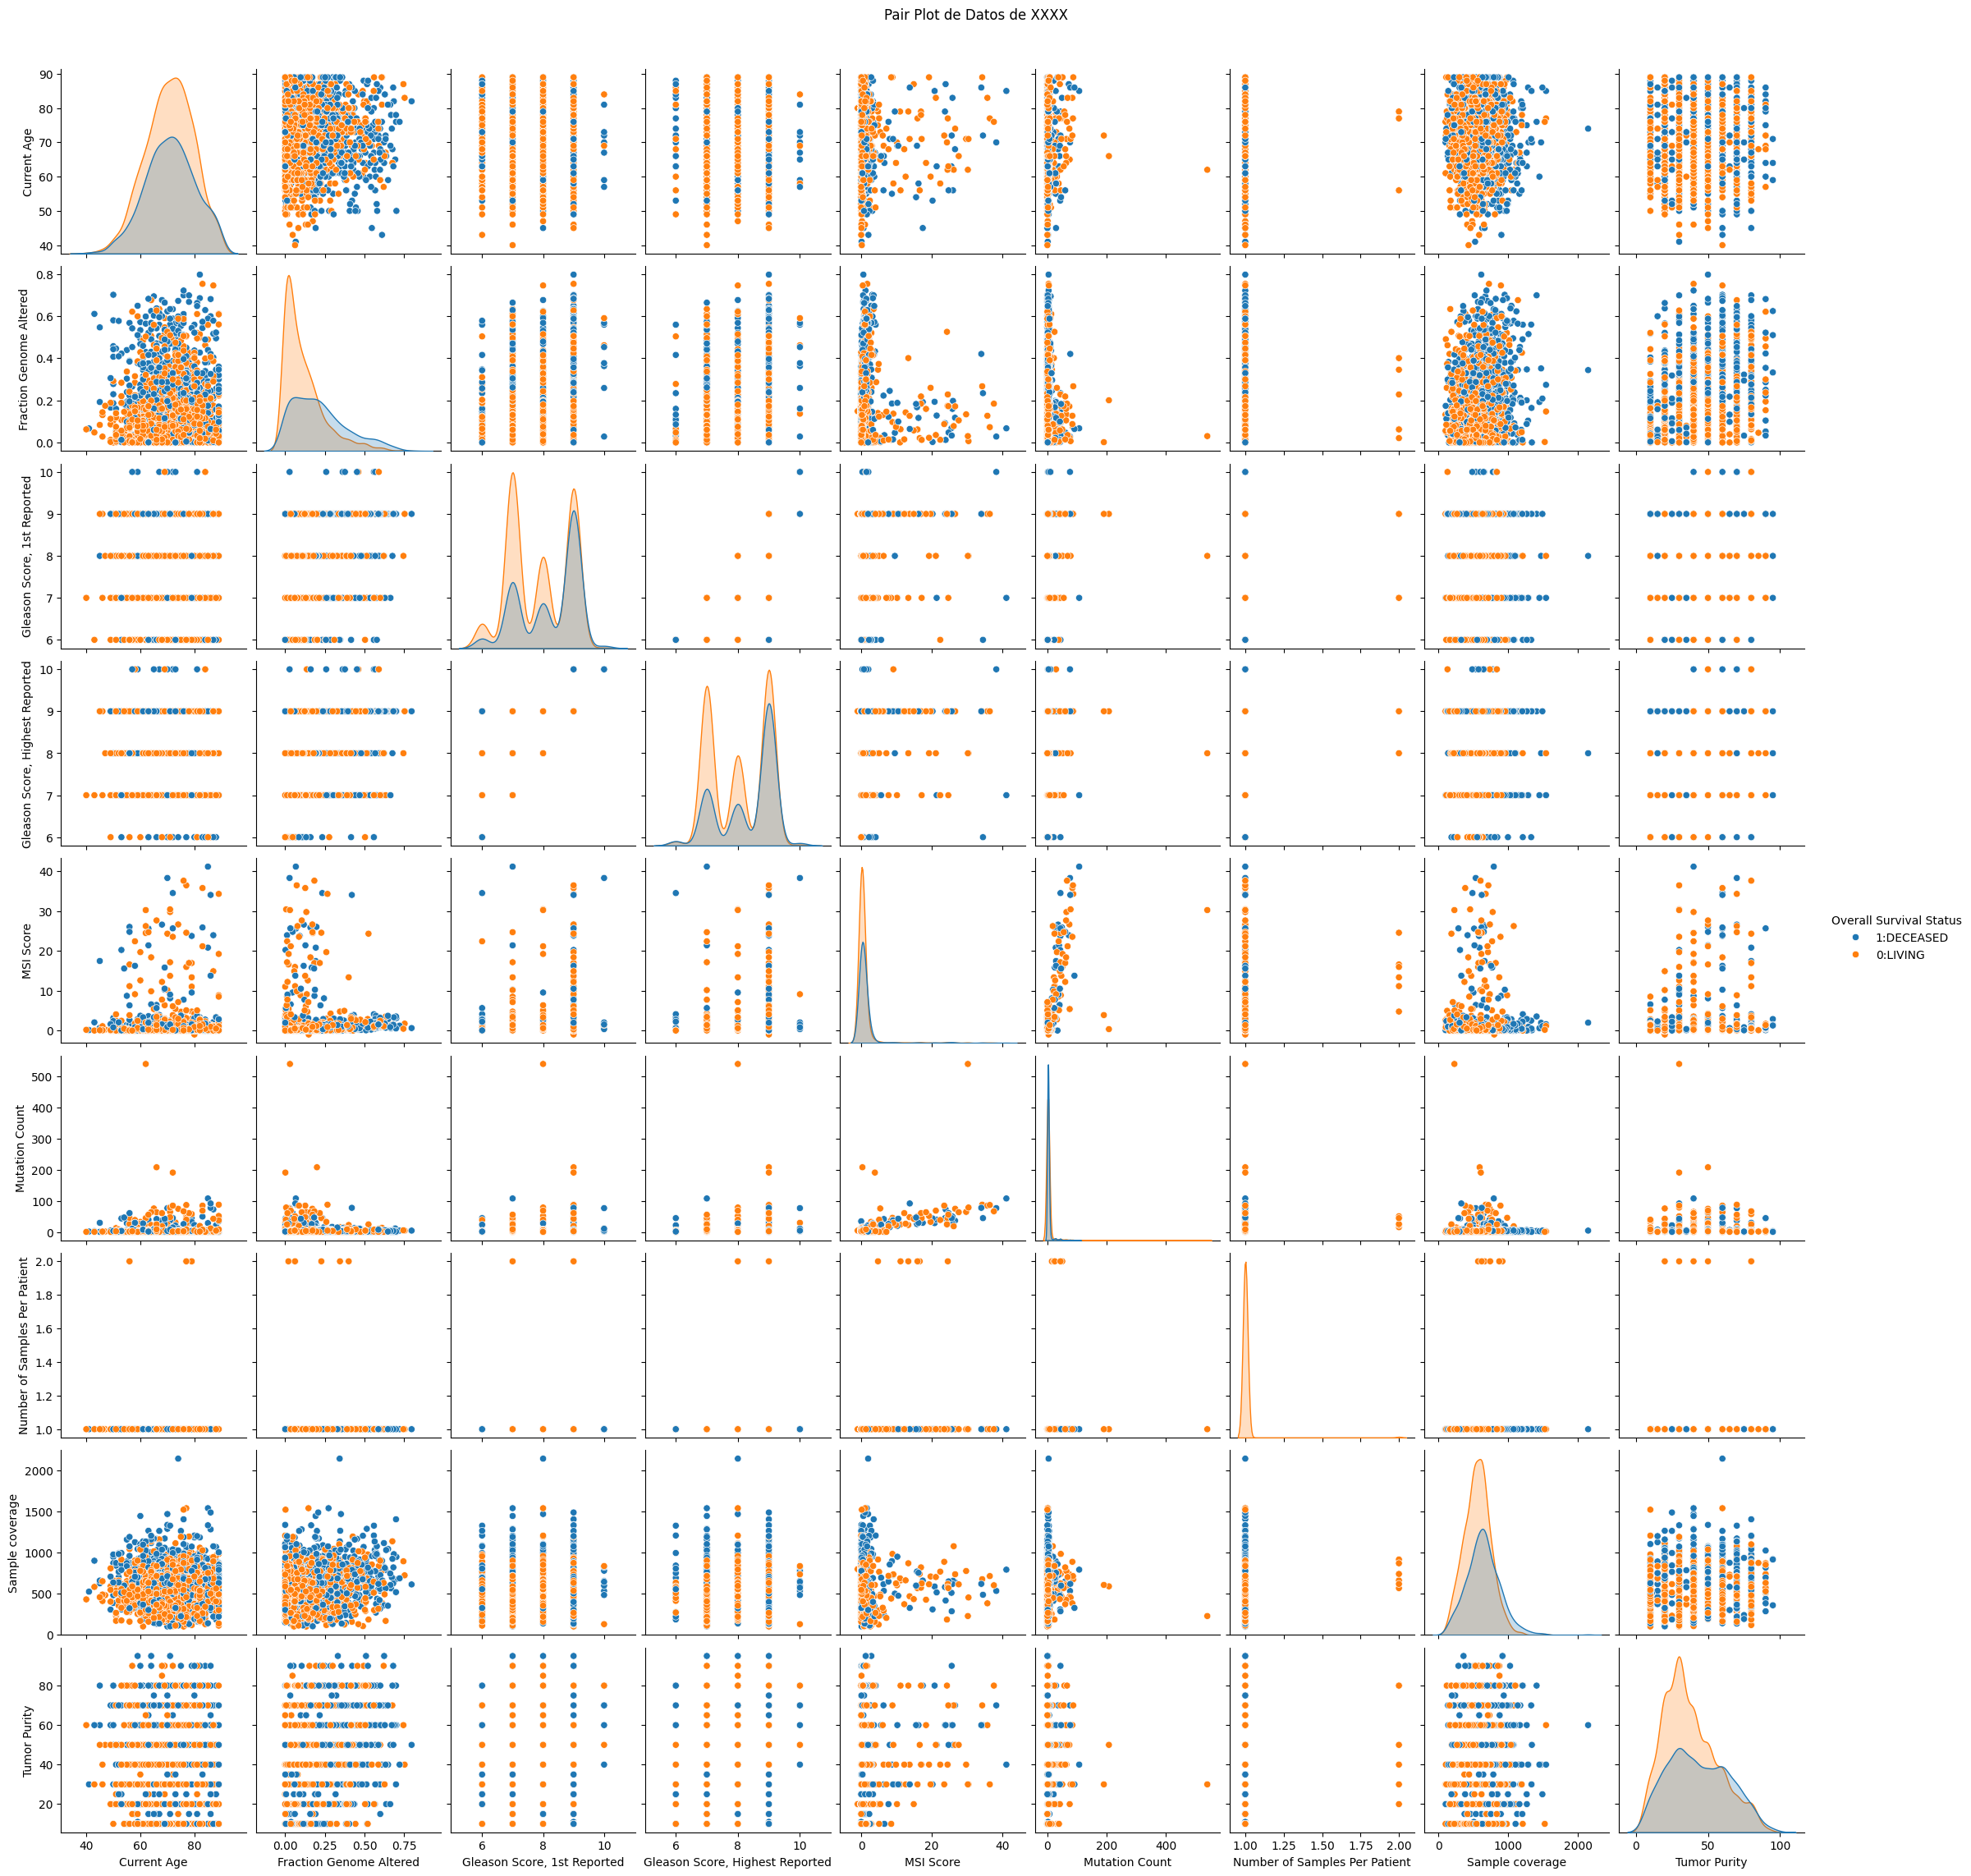

Pair Plot generado.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#df_subset = df[["TMB (nonsynonymous)", "Overall Survival Status","Progression Free Survival Status", "MSI Score","Cancer Type Detailed","Ethnicity"]]
# Pair Plot: Visualiza las relaciones entre todas las variables numéricas
# Esto puede tardar un poco dependiendo del tamaño de tus datos.
print("\nGenerando Pair Plot...")
sns.pairplot(df, hue='Overall Survival Status', diag_kind='kde') # 'hue' para diferenciar por sobrevivencia
plt.suptitle('Pair Plot de Datos de XXXX', y=1.02) # Título general
plt.show()
print("Pair Plot generado.")

In [21]:
# Mostrar las primeras filas de nuestro DataFrame
print("Primeras filas de los datos:")
print(df.head())

# Obtener un resumen estadístico de las variables numéricas
print("\nResumen estadístico de los datos:")
print(df_final.describe())

# Información general del DataFrame
print("\nInformación general del DataFrame:")
df.info()

Primeras filas de los datos:
            Study ID Patient ID          Sample ID      Cancer Type  \
0  prostate_msk_2024  P-0000140  P-0000140-T01-IM3  Prostate Cancer   
1  prostate_msk_2024  P-0000197  P-0000197-T01-IM3  Prostate Cancer   
2  prostate_msk_2024  P-0000318  P-0000318-T01-IM3  Prostate Cancer   
3  prostate_msk_2024  P-0000373  P-0000373-T01-IM3  Prostate Cancer   
4  prostate_msk_2024  P-0000377  P-0000377-T03-IM3  Prostate Cancer   

                Cancer Type Detailed  Current Age                  Ethnicity  \
0  Prostate Neuroendocrine Carcinoma         45.0  Non-Spanish; Non-Hispanic   
1            Prostate Adenocarcinoma         80.0  Non-Spanish; Non-Hispanic   
2            Prostate Adenocarcinoma         67.0  Non-Spanish; Non-Hispanic   
3            Prostate Adenocarcinoma         58.0  Non-Spanish; Non-Hispanic   
4            Prostate Adenocarcinoma         64.0  Non-Spanish; Non-Hispanic   

   Fraction Genome Altered Gene Panel  Gleason Score, 1st Repor

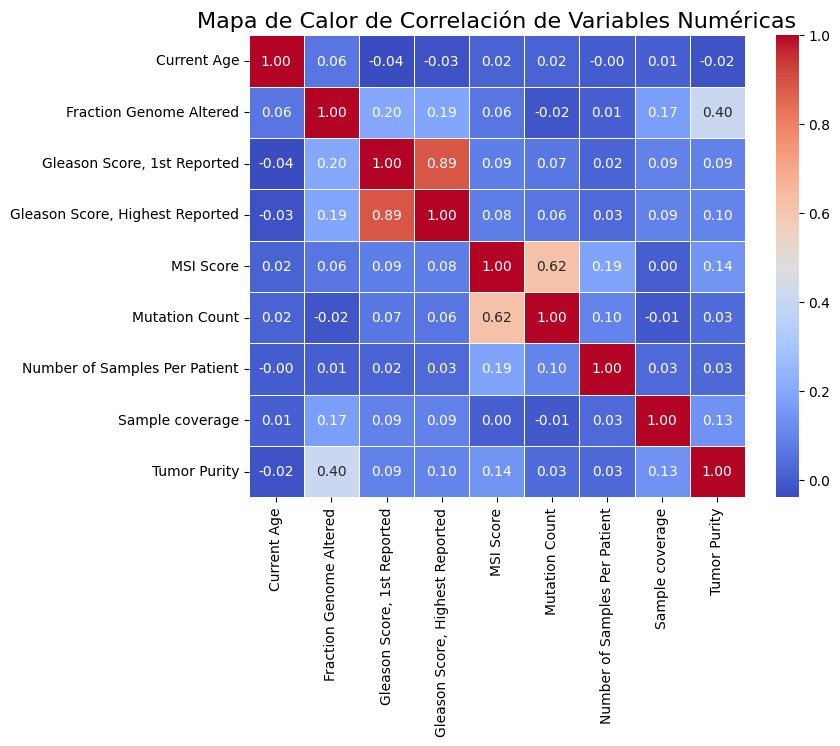

In [23]:
# Calculamos la matriz de correlación para las variables numéricas
matriz_correlacion = df.corr(numeric_only=True) # Solo variables numéricas

# Creamos un mapa de calor
plt.figure(figsize=(8, 6)) # Ajustamos el tamaño del gráfico
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación de Variables Numéricas', fontsize=16)
plt.show()

In [25]:


# Identificadores y campos que NO queremos codificar (ni usar como predictores)
id_like = ["Study ID", "Patient ID", "Sample ID"]
TARGET = "Overall Survival (Months)" # Definir la variable objetivo

# Seleccionar columnas categóricas (tipo 'object' tras la coerción numérica)
# Excluimos identificadores del one-hot y del target
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
categoricas = [c for c in categoricas if c not in id_like and c != TARGET]

datos_cancer = pd.get_dummies(df.drop(columns=id_like, errors="ignore"),
                              columns=categoricas, drop_first=True)


print("Datos después de crear variables dummy:")
display(datos_cancer.head())

# Definir la variable dependiente (Y) y las variables independientes (X)
# Asegurarse de que la columna TARGET exista en datos_cancer antes de intentar eliminarla
if TARGET in datos_cancer.columns:
  X = datos_cancer.drop(TARGET, axis=1) # Todas las columnas excepto la variable objetivo
  Y = datos_cancer[TARGET] # Solo la columna objetivo
else:
  print(f"Error: La columna objetivo '{TARGET}' no se encuentra en el DataFrame 'datos_cancer'.")
  X = None
  Y = None


if X is not None and Y is not None:
  print(f"\nNúmero de variables predictoras (X): {X.shape[1]}")
  print(f"Nombres de las variables predictoras (primeras 20): {X.columns.tolist()[:20]}")

Datos después de crear variables dummy:


,Current Age,Fraction Genome Altered,"Gleason Score, 1st Reported","Gleason Score, Highest Reported",MSI Score,Mutation Count,Overall Survival (Months),Number of Samples Per Patient,Sample coverage,Tumor Purity,...,TMB (nonsynonymous)_7.782.282.855,TMB (nonsynonymous)_7.829.757.581,TMB (nonsynonymous)_8.808.477.279,TMB (nonsynonymous)_8.873.242.405,TMB (nonsynonymous)_864.698.095,TMB (nonsynonymous)_9.338.739.426,TMB (nonsynonymous)_9.511.679.045,TMB (nonsynonymous)_9.787.196.976,TMB (nonsynonymous)_9.844.166.839,TMB (nonsynonymous)_9.982.397.705
0,45.0,0.5462,8.0,9.0,0.67,1.0,0.32876352,1,629,60.0,...,False,False,False,False,False,False,False,False,False,False
1,80.0,0.0604,NaN,NaN,0.09,3.0,466.844.199,1,1188,30.0,...,False,False,False,False,False,False,False,False,False,False
2,67.0,0.5589,10.0,10.0,1.67,3.0,1.315.054.082,1,782,60.0,...,False,False,False,False,False,False,False,False,False,False
3,58.0,0.0023,9.0,9.0,0.09,1.0,3.409.277.707,1,708,60.0,...,False,False,False,False,False,False,False,False,False,False
4,64.0,0.4249,9.0,9.0,2.73,9.0,3.047.637.834,1,805,80.0,...,False,False,False,False,False,False,False,False,False,True



Número de variables predictoras (X): 183
Nombres de las variables predictoras (primeras 20): ['Current Age', 'Fraction Genome Altered', 'Gleason Score, 1st Reported', 'Gleason Score, Highest Reported', 'MSI Score', 'Mutation Count', 'Number of Samples Per Patient', 'Sample coverage', 'Tumor Purity', 'Cancer Type Detailed_Prostate Neuroendocrine Carcinoma', 'Cancer Type Detailed_Prostate Small Cell Carcinoma', 'Cancer Type Detailed_Prostate Squamous Cell Carcinoma', 'Ethnicity_Dominican Republic', 'Ethnicity_Mexican (includes Chicano)', 'Ethnicity_Non-Spanish; Non-Hispanic', 'Ethnicity_Other Spanish/Hispanic(incl European; excl Dom Rep', 'Ethnicity_Puerto Rican', 'Ethnicity_South/Central America (except Brazil)', 'Ethnicity_Spanish  NOS; Hispanic NOS, Latino NOS', 'Ethnicity_Unknown']


In [38]:
# !pip install -q statsmodels
import numpy as np, pandas as pd, statsmodels.api as sm

# Se define la Variable objetivo
TARGET = "Overall Survival (Months)"


#  Forzar numéricos para columnas object
numeric_like = [
    "Current Age","Fraction Genome Altered","Gleason Score, 1st Reported",
    "Gleason Score, Highest Reported","MSI Score","Mutation Count",
    "Overall Survival (Months)","Progression Free Survival Status (months)",
    "TMB (nonsynonymous)","Tumor Purity","Sample coverage","Number of Samples Per Patient"
]
df2 = df.copy()
for c in numeric_like:
    if c in df2.columns:
        df2[c] = pd.to_numeric(df2[c], errors="coerce")

# Se separa variable objetivo y se construye X con dummies limpias
if TARGET not in df2.columns:
    raise ValueError(f"No existe la columna objetivo: {TARGET}")

y = pd.to_numeric(df2[TARGET], errors="coerce")
# se excluyen variables ID
id_like = ["Study ID","Patient ID","Sample ID"]
drop_cols = id_like + [TARGET]

cat_cols = df2.select_dtypes(include="object").columns.difference(drop_cols)
X = pd.get_dummies(df2.drop(columns=drop_cols, errors="ignore"),
                   columns=cat_cols, drop_first=True)

# Se convierten variables X a número
for c in X.columns:
    if X[c].dtype == bool:
        X[c] = X[c].astype(np.int8)
X = X.apply(pd.to_numeric, errors="coerce").replace([np.inf, -np.inf], np.nan)

# Se quitan filas y columnas problematicas
model_df = pd.concat([y.rename("Y"), X], axis=1)

print(f"Shape of model_df after concat: {model_df.shape}")

# Quita filas sin Y
model_df = model_df.dropna(subset=["Y"])
print(f"Shape of model_df after dropping rows with NaN in Y: {model_df.shape}")


# quita filas con NaN en X
model_df = model_df.dropna(axis=0)
print(f"Shape of model_df after dropping rows with NaN in X: {model_df.shape}")


# Se Elimina columnas constantes (varianza 0) que provocan singularidad
const_cols = [c for c in model_df.columns if c != "Y" and model_df[c].nunique(dropna=True) <= 1]
if const_cols:
    print(f"Dropping constant columns: {const_cols}")
    model_df = model_df.drop(columns=const_cols)
    print(f"Shape of model_df after dropping constant columns: {model_df.shape}")


Y = model_df["Y"]
X = model_df.drop(columns=["Y"])
print(f"Shape of X before adding constant: {X.shape}")

# Se añade intercepto y se chequea rango (para evitar df_resid<=0)
X = sm.add_constant(X, has_constant="add")
n, p = X.shape
rank = np.linalg.matrix_rank(X)
print(f"n={n}, p={p}, rango(X)={rank}, df_resid≈{n - rank}")

# Se ajusta  OLS (con errores robustos HC3 por posible heterocedasticidad)
modelo = sm.OLS(Y.astype(float), X.astype(float)).fit(cov_type="HC3")
print(modelo.summary())

Shape of model_df after concat: (2260, 48)
Shape of model_df after dropping rows with NaN in Y: (35, 48)
Dropping constant columns: ['Progression Free Survival Status (months)', 'Number of Samples Per Patient', 'Cancer Type Detailed_Prostate Squamous Cell Carcinoma', 'Ethnicity_Dominican Republic', 'Ethnicity_Mexican (includes Chicano)', 'Ethnicity_Other Spanish/Hispanic(incl European; excl Dom Rep', 'Ethnicity_Puerto Rican', 'Ethnicity_South/Central America (except Brazil)', 'Ethnicity_Spanish  NOS; Hispanic NOS, Latino NOS', 'Ethnicity_Unknown', 'Gene Panel_IMPACT505', 'MSI Type_Instable', 'Oncotree Code_PRSC', 'Progression Free Survival Status_1:Recurred/Progressed', 'Race_NO VALUE ENTERED', 'Race_UNKNOWN', 'Sample Type_Unknown', 'Somatic Status_Unmatched']
Shape of model_df after dropping constant columns: (35, 30)
Shape of X before adding constant: (35, 29)
n=35, p=30, rango(X)=25, df_resid≈10
                            OLS Regression Results                            
Dep. Vari

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 29, but rank is 25
  warnings.warn('covariance of constraints does not have full '


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculamos VIF para cada variable predictora
# Es importante calcular VIF en el DataFrame X original (sin la constante)
# o en la versión X con constante, pero ignorando la constante para el cálculo VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Excluimos el VIF del intercepto (const) ya que no es una variable predictora de interés
vif_data = vif_data[vif_data['feature'] != 'const']

print("\nFactores de Inflación de la Varianza (VIF):")
print(vif_data.sort_values(by='VIF', ascending=False))


Factores de Inflación de la Varianza (VIF):
                                              feature        VIF
13           Ethnicity_Unknown whether Spanish or not        inf
10  Cancer Type Detailed_Prostate Neuroendocrine C...        inf
11  Cancer Type Detailed_Prostate Small Cell Carci...        inf
12                Ethnicity_Non-Spanish; Non-Hispanic        inf
17                                    MSI Type_Stable        inf
18                                 Oncotree Code_PRNE        inf
19                                Oncotree Code_PRSCC        inf
27                                Sample Type_Primary        inf
26                             Sample Type_Metastasis        inf
16                             MSI Type_Indeterminate        inf
3                         Gleason Score, 1st Reported  16.971808
5                                           MSI Score  13.150008
2                             Fraction Genome Altered  10.899905
4                     Gleason Score, Highest 

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Qué está pasando

inf en:

Sample Type_Primary y Sample Type_Metastasis → trampa de la dummy en una variable binaria: las dos dummies + el intercepto cumplen primary + metastasis = const.

Pares redundantes: Cancer Type Detailed_Prostate Neuroendocrine Carcinoma ↔ Oncotree Code_PRNE, y ... Small Cell ... ↔ Oncotree Code_PRSCC → codifican lo mismo (colinealidad perfecta).

MSI Type_Stable/Indeterminate junto a otras dummies/variables puede generar combinaciones lineales; además, si tienes MSI Score, no necesitas MSI Type.

Ethnicity_* con inf suele indicar que incluiste todas las categorías (o una combinación con otras columnas hace que una sea exactamente predecible).

VIF alto (≈11–17) en: Gleason 1st, Gleason Highest, MSI Score, Fraction Genome Altered → están muy correlacionadas entre sí o con otras covariables (p. ej., los dos Gleason).

In [40]:
#Eliminamos redundancias y volvemos a ejecutar VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

Xv = X.drop(columns=['const'], errors='ignore').copy()

# Quitar redundancias entre variables
Xv = Xv.drop(columns=[c for c in Xv.columns if c.startswith('Cancer Type Detailed_')], errors='ignore')  # nos quedamos con Oncotree
Xv = Xv.drop(columns=[c for c in Xv.columns if c.startswith('MSI Type_')], errors='ignore')
Xv = Xv.drop(columns=['Overall Survival Status_1:DECEASED'], errors='ignore')

# Variables binarias: dejar solo una dummy
if 'Sample Type_Primary' in Xv.columns and 'Sample Type_Metastasis' in Xv.columns:
    Xv = Xv.drop(columns=['Sample Type_Primary'])  # o la otra

# Gleason: quedarnos con Highest (o crea "upgrade" y quita ambas)
if 'Gleason Score, 1st Reported' in Xv.columns:
    Xv = Xv.drop(columns=['Gleason Score, 1st Reported'])

# Quitar columnas de varianza cero
Xv = Xv.loc[:, Xv.nunique() > 1]

# Recalcular VIF (sin intercepto)
vif = pd.DataFrame({
    "feature": Xv.columns,
    "VIF": [variance_inflation_factor(Xv.values, i) for i in range(Xv.shape[1])]
}).sort_values("VIF", ascending=False)
print(vif.head(20))

                                     feature         VIF
8        Ethnicity_Non-Spanish; Non-Hispanic  304.165688
9   Ethnicity_Unknown whether Spanish or not   12.887563
11                      Gene Panel_IMPACT468    7.760395
1                    Fraction Genome Altered    7.430183
18                                Race_WHITE    6.168835
10                      Gene Panel_IMPACT410    6.063228
3                                  MSI Score    4.620302
17            Race_PATIENT REFUSED TO ANSWER    3.884020
19                    Sample Type_Metastasis    3.532342
5                            Sample coverage    3.496755
20                             Stage_Stage 4    3.469288
0                                Current Age    3.417147
4                             Mutation Count    3.227124
2            Gleason Score, Highest Reported    3.113429
13                       Oncotree Code_PRSCC    2.879518
7                               Tumor Purity    2.853950
21                             

In [41]:
# Frecuencias
print(df['Ethnicity'].value_counts(dropna=False))
print(df['Race'].value_counts(dropna=False))

# Combinatorias que revelan redundancia Race↔Ethnicity
print(pd.crosstab(df['Race'], df['Ethnicity']))


Ethnicity
Non-Spanish; Non-Hispanic                             2017
Unknown whether Spanish or not                         129
Spanish  NOS; Hispanic NOS, Latino NOS                  79
South/Central America (except Brazil)                   10
Unknown                                                 10
Puerto Rican                                             8
Dominican Republic                                       3
Mexican (includes Chicano)                               1
Other Spanish/Hispanic(incl European; excl Dom Rep       1
Cuban                                                    1
NaN                                                      1
Name: count, dtype: int64
Race
WHITE                             1865
BLACK OR AFRICAN AMERICAN          175
ASIAN-FAR EAST/INDIAN SUBCONT       81
PATIENT REFUSED TO ANSWER           79
OTHER                               41
NO VALUE ENTERED                    10
UNKNOWN                              7
NATIVE HAWAIIAN OR PACIFIC ISL       

In [42]:
df2 = df.copy()

# Indicador simple de Hispanic (si tu columna de Ethnicity lo permite)
df2['is_hispanic'] = df2['Ethnicity'].astype(str).str.contains('Spanish|Hispanic', case=False, na=False).astype(int)

# Nos quedamos con Race dummies + indicador is_hispanic y quitamos dummies detalladas de Ethnicity
keep_cols = [c for c in X.columns if c.startswith('Race_')] + ['is_hispanic',
               'Current Age','Fraction Genome Altered','Gleason Score, Highest Reported',
               'MSI Score','Mutation Count','Sample coverage','Tumor Purity',
               'Gene Panel_IMPACT410','Gene Panel_IMPACT468','Stage_Stage 4','Stage_Unknown',
               'Oncotree Code_PRNE','Oncotree Code_PRSCC']  # ajusta a tus columnas reales

Xv = X.reindex(columns=[c for c in keep_cols if c in X.columns], fill_value=0)

# Recalcular VIF sin la constante
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
vif = pd.DataFrame({
    "feature": Xv.columns,
    "VIF": [variance_inflation_factor(Xv.values, i) for i in range(Xv.shape[1])]
}).sort_values("VIF", ascending=False)
print(vif.head(20))


                                feature         VIF
5                           Current Age  176.818499
7       Gleason Score, Highest Reported  171.457480
13                 Gene Panel_IMPACT468   20.917185
4                            Race_WHITE   20.255061
10                      Sample coverage   17.185335
11                         Tumor Purity   12.361596
6               Fraction Genome Altered    9.013782
9                        Mutation Count    8.889042
12                 Gene Panel_IMPACT410    6.869171
8                             MSI Score    4.419410
14                        Stage_Stage 4    3.909485
15                        Stage_Unknown    3.861338
3        Race_PATIENT REFUSED TO ANSWER    3.144887
17                  Oncotree Code_PRSCC    2.228155
16                   Oncotree Code_PRNE    2.212905
0        Race_BLACK OR AFRICAN AMERICAN    2.185063
2                            Race_OTHER    2.064383
1   Race_NATIVE HAWAIIAN OR PACIFIC ISL    1.681449


In [43]:
n, p = X.shape
print("n filas:", n, " | p predictores:", p)


n filas: 35  | p predictores: 30


Si tienes pocas filas útiles respecto al nº de columnas, VIF se dispara.
Si n/p < 10, reduce p (menos dummies/variables)

In [44]:
#Encontrar “culpables” que explican Edad y Gleason
import statsmodels.api as sm
import numpy as np

def r2_explicado(objetivo, X):
    y = X[objetivo]
    Z = sm.add_constant(X.drop(columns=[objetivo], errors='ignore'))
    r2 = sm.OLS(y, Z).fit().rsquared
    return r2

for target in ["Current Age","Gleason Score, Highest Reported"]:
    cols = [c for c in X.columns if c != target]
    r2 = r2_explicado(target, X[[target]+cols].dropna())
    print(f"{target}: R² explicado por el resto = {r2:.3f}")


Current Age: R² explicado por el resto = 0.779
Gleason Score, Highest Reported: R² explicado por el resto = 0.902


In [45]:
#Eliminar dummies problemáticas y volver a calcular VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

Xv = X.drop(columns=['const'], errors='ignore').copy()

# Simplificar Race a binario
Xv['race_white'] = (Xv.get('Race_WHITE', 0) == 1).astype(int)
Xv = Xv.drop(columns=[c for c in Xv.columns if c.startswith('Race_') and c != 'Race_WHITE'],
             errors='ignore')

# Panel: dejar uno solo o quitar ambos
Xv = Xv.drop(columns=['Gene Panel_IMPACT468'], errors='ignore')

#  Evitar parejas funcionales
if 'Mutation Count' in Xv.columns and 'Sample coverage' in Xv.columns:
    Xv = Xv.drop(columns=['Sample coverage'])

# Quitar columnas de varianza cero
Xv = Xv.loc[:, Xv.nunique() > 1]

# Recalcular VIF
vif = pd.DataFrame({
    "feature": Xv.columns,
    "VIF": [variance_inflation_factor(Xv.values, i) for i in range(Xv.shape[1])]
}).sort_values("VIF", ascending=False)
print(vif.head(20))


                                              feature        VIF
16                                Oncotree Code_PRSCC        inf
15                                 Oncotree Code_PRNE        inf
14                                    MSI Type_Stable        inf
13                             MSI Type_Indeterminate        inf
11           Ethnicity_Unknown whether Spanish or not        inf
10                Ethnicity_Non-Spanish; Non-Hispanic        inf
9   Cancer Type Detailed_Prostate Small Cell Carci...        inf
8   Cancer Type Detailed_Prostate Neuroendocrine C...        inf
23                                         race_white        inf
18                                         Race_WHITE        inf
19                             Sample Type_Metastasis        inf
20                                Sample Type_Primary        inf
2                         Gleason Score, 1st Reported  11.293466
4                                           MSI Score   8.606290
3                     Gle

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


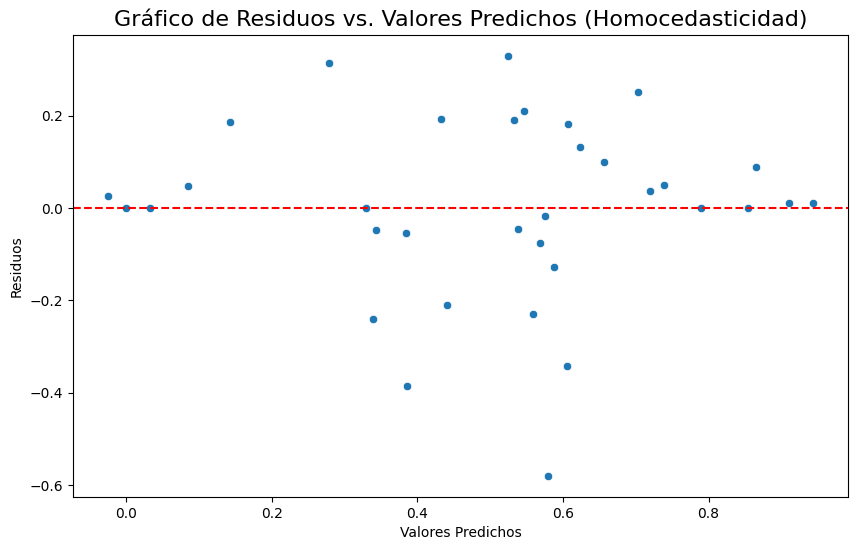

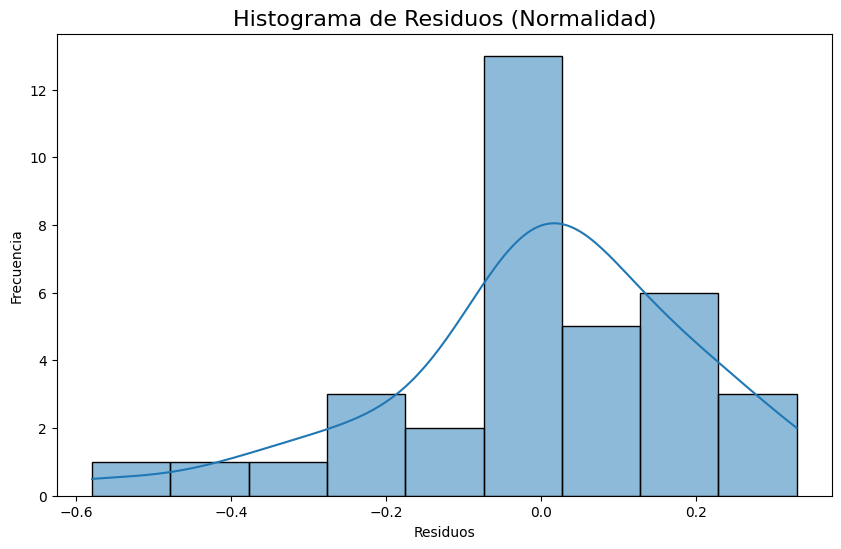

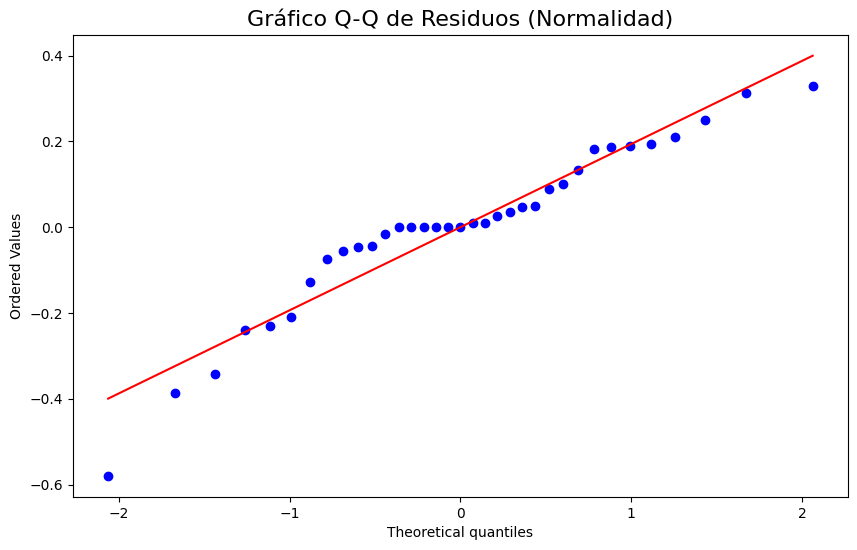

In [49]:
# Obtener los residuos del modelo
residuos = modelo.resid

# Obtener los valores predichos
valores_predichos = modelo.fittedvalues

# 1. Homocedasticidad (varianza constante de los errores)
# Gráfico de Residuos vs. Valores Predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=valores_predichos, y=residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Predichos (Homocedasticidad)", fontsize=16)
plt.show()

# 2. Normalidad de los Residuos
# Histograma de Residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos (Normalidad)", fontsize=16)
plt.show()

# Gráfico Q-Q para la Normalidad de los Residuos
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Residuos (Normalidad)", fontsize=16)
plt.show()


=== Resumen OLS con transformación log1p(Y) ===
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                 -0.288
Method:                 Least Squares   F-statistic:                     13.24
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           8.51e-05
Time:                        02:34:51   Log-Likelihood:                 20.231
No. Observations:                  35   AIC:                             9.539
Df Residuals:                      10   BIC:                             48.42
Df Model:                          24                                         
Covariance Type:                  HC3                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 29, but rank is 25
  warnings.warn('covariance of constraints does not have full '


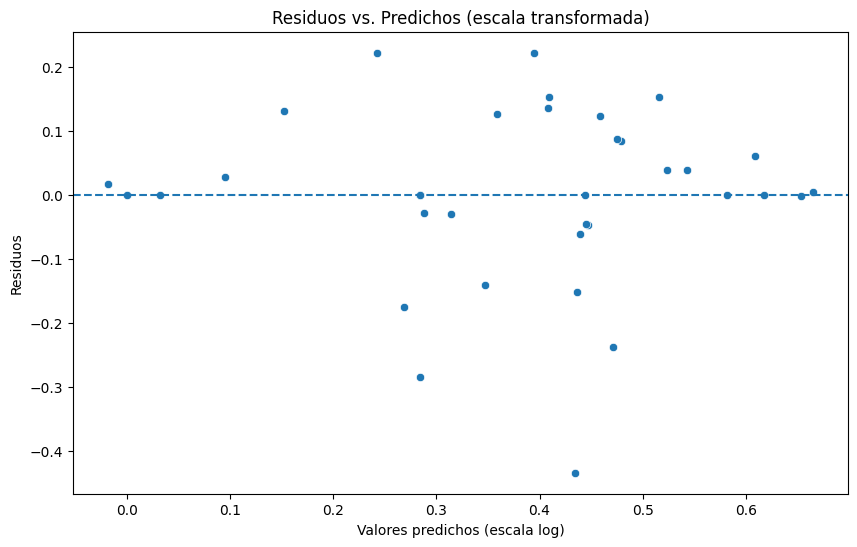

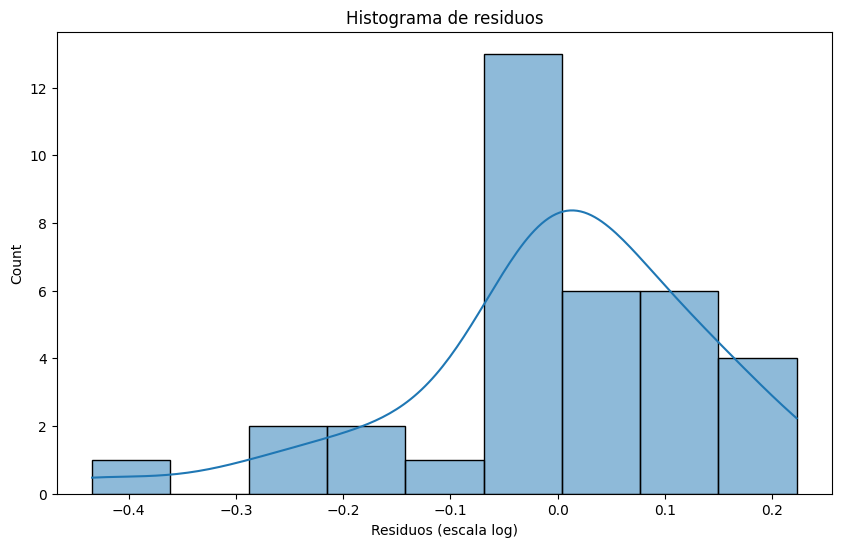

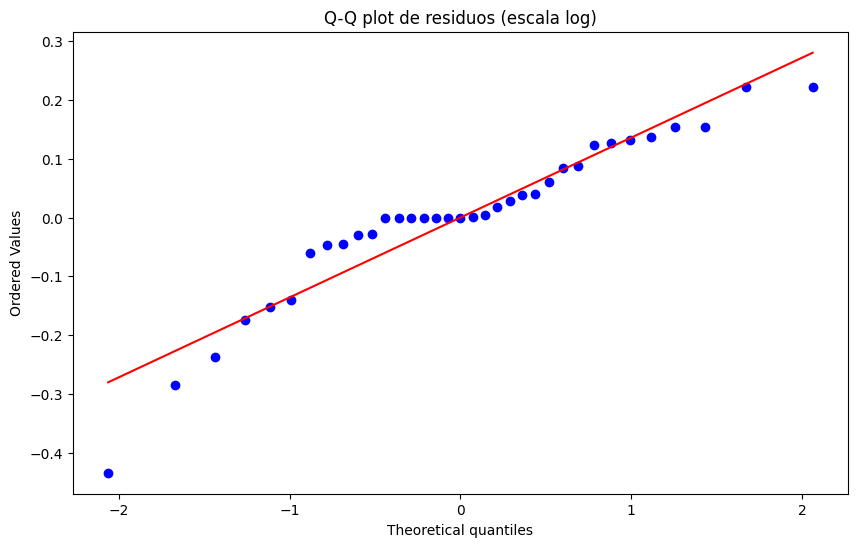

Breusch–Pagan p-val: 0.9708 | White p-val: 0.1797

MAE (mediana back-transform): 0.135 | RMSE: 0.190
MAE (smearing de Duan)     : 0.137 | RMSE: 0.190

Efectos porcentuales aproximados (exp(beta)-1)*100:
Race_BLACK OR AFRICAN AMERICAN                            62.70
Race_WHITE                                                29.21
TMB (nonsynonymous)                                       24.83
Stage_Unknown                                             22.91
Oncotree Code_PRSCC                                       21.25
Cancer Type Detailed_Prostate Small Cell Carcinoma        21.25
Gleason Score, Highest Reported                           10.64
Sample Type_Metastasis                                     4.24
MSI Type_Indeterminate                                     2.70
Stage_Stage 4                                              2.37
Ethnicity_Non-Spanish; Non-Hispanic                        1.66
Current Age                                                0.74
Tumor Purity                 

In [52]:
# Preparar Y logarítmica (log o log1p)
import numpy as np
import pandas as pd
import statsmodels.api as sm

Y_raw = pd.to_numeric(Y, errors="coerce")
# Si hay valores <=0, usamos log1p para evitar -inf
use_log1p = (Y_raw <= 0).any()
if use_log1p:
    Y_log = np.log1p(Y_raw)
    inv = np.expm1
    trans_name = "log1p"
else:
    Y_log = np.log(Y_raw)
    inv = np.exp
    trans_name = "log"

# Alinear y filtrar filas válidas (sin NaN en X ni en Y_log)
mask = np.isfinite(Y_log) & np.isfinite(X).all(axis=1)
X_t = X.loc[mask].astype(float).copy()
Y_t = Y_log.loc[mask].astype(float).copy()

# Asegurar intercepto
if "const" not in X_t.columns:
    X_t = sm.add_constant(X_t, has_constant="add")

# Reajustar OLS con Y transformada (errores robustos recomendados)
modelo_log = sm.OLS(Y_t, X_t).fit(cov_type="HC3")
print(f"\n=== Resumen OLS con transformación {trans_name}(Y) ===")
print(modelo_log.summary())

# Diagnósticos en la escala transformada (residuos ~ N(0,σ²) y homocedasticidad) ---
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

residuos = modelo_log.resid
valores_predichos = modelo_log.fittedvalues

plt.figure(figsize=(10,6))
sns.scatterplot(x=valores_predichos, y=residuos)
plt.axhline(0, linestyle="--")
plt.xlabel("Valores predichos (escala log)")
plt.ylabel("Residuos")
plt.title("Residuos vs. Predichos (escala transformada)")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(residuos, kde=True)
plt.xlabel("Residuos (escala log)")
plt.title("Histograma de residuos")
plt.show()

plt.figure(figsize=(10,6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q plot de residuos (escala log)")
plt.show()

# (Opcional) tests formales
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
bp = het_breuschpagan(residuos, sm.add_constant(valores_predichos))
wh = het_white(residuos, sm.add_constant(valores_predichos))
print(f"Breusch–Pagan p-val: {bp[1]:.4g} | White p-val: {wh[1]:.4g}")

# Predicciones en la escala original con y sin smearing ---
# Mediana (back-transform "puro"): inv(fitted)
yhat_mediana = inv(valores_predichos)

# Smearing de Duan para aproximar E[Y|X] en la escala original
# Para log y log1p: E[exp(fitted + resid)] = exp(fitted) * E[exp(resid)]
smear = np.mean(np.exp(residuos))
yhat_smear = np.exp(valores_predichos) * smear
if use_log1p:
    yhat_smear = yhat_smear - 1  # corregir por log1p

# Comparar error en la escala original
Y_obs = Y_raw.loc[X_t.index].astype(float)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
mae_med = mean_absolute_error(Y_obs, yhat_mediana)
rmse_med = math.sqrt(mean_squared_error(Y_obs, yhat_mediana))
mae_smear = mean_absolute_error(Y_obs, yhat_smear)
rmse_smear = math.sqrt(mean_squared_error(Y_obs, yhat_smear))
print(f"\nMAE (mediana back-transform): {mae_med:,.3f} | RMSE: {rmse_med:,.3f}")
print(f"MAE (smearing de Duan)     : {mae_smear:,.3f} | RMSE: {rmse_smear:,.3f}")

# (Opcional) Interpretación de coeficientes ---
# En modelos log-lineales, 100*beta ≈ % cambio en Y por 1 unidad de X pequeño.
# Para dummies, el % exacto ≈ (exp(beta)-1)*100
coefs = modelo_log.params.copy()
effects_pct = (np.exp(coefs) - 1) * 100  # interpretación porcentual aproximada
print("\nEfectos porcentuales aproximados (exp(beta)-1)*100:")
print(effects_pct.sort_values(ascending=False).round(2))


## LIMPIEZA

In [31]:
# 1. Eliminar columnas con más del 80% de valores nulos
threshold = 0.8
cols_to_drop = [col for col in df.columns if df[col].isnull().mean() > threshold]
df_clean = df.drop(columns=cols_to_drop)
print(f"Columnas eliminadas por exceso de nulos: {cols_to_drop}")

# Convert 'Overall Survival (Months)' and 'TMB (nonsynonymous)' to numeric after removing periods
df_clean['Overall Survival (Months)'] = df_clean['Overall Survival (Months)].astype(str).str.replace('.', '', regex=False)
df_clean['Overall Survival (Months)'] = pd.to_numeric(df_clean['Overall Survival (Months)'], errors='coerce')

df_clean['TMB (nonsynonymous)'] = df_clean['TMB (nonsynonymous)'].astype(str).str.replace('.', '', regex=False)
df_clean['TMB (nonsynonymous)'] = pd.to_numeric(df_clean['TMB (nonsynonymous)'], errors='coerce')


# 2. Imputar valores faltantes en columnas numéricas con la mediana
for col in df_clean.select_dtypes(include=['float64', 'int64']):
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# 3. Estandarizar valores en 'Race' y 'Ethnicity'
df_clean['Race'] = df_clean['Race'].str.upper().str.strip()
df_clean['Ethnicity'] = df_clean['Ethnicity'].str.upper().str.strip()

# 4. Eliminar filas duplicadas
df_clean = df_clean.drop_duplicates()

# 5. (Opcional) Eliminar outliers extremos en columnas numéricas usando IQR
#for col in df_clean.select_dtypes(include=['float64', 'int64']):
#    Q1 = df_clean[col].quantile(0.25)
#    Q3 = df_clean[col].quantile(0.75)
#    IQR = Q3 - Q1
#    lower = Q1 - 1.5 * IQR
#    upper = Q3 + 1.5 * IQR
#    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper) | df_clean[col].isnull()]

# 6. Agrupar por Patient ID y promediar las columnas numéricas
# The list 'numerical_cols_for_boxplot' is defined in a later cell and includes
# 'Overall Survival (Months)' and 'TMB (nonsynonymous)' which are now numeric.
numerical_cols_for_aggregation = [
    'Current Age',
    'Fraction Genome Altered',
    'Gleason Score, 1st Reported',
    'Gleason Score, Highest Reported',
    'MSI Score',
    'Mutation Count',
    'Overall Survival (Months)',
    'Sample coverage',
    'TMB (nonsynonymous)',
    'Tumor Purity'
]

df_promediado = df_clean.groupby('Patient ID', as_index=False)[numerical_cols_for_aggregation].mean()


# 7. Si quieres mantener columnas categóricas (por ejemplo, la primera ocurrencia)
columnas_categoricas = [col for col in df_clean.columns if col not in numerical_cols_for_aggregation + ['Patient ID']]
df_categoricas = df.groupby('Patient ID', as_index=False)[columnas_categoricas].first()

# 8. Unir ambos resultados
df_final = pd.merge(df_promediado, df_categoricas, on='Patient ID', how='left')

# 9. Imputar values faltantes en 'MSI Type' con la moda (valor más frecuente)
# Use df_final here as it's the dataframe being used for further steps
df_final['MSI Type'] = df_final['MSI Type'].fillna('UNKNOWN')


# 10. Display de las primeras filas del Dataset limpio, el N° de pacientes únicos y la confirmación de la limpieza realizada
print(f"Ahora tienes {df_final.shape[0]} pacientes únicos con valores promediados.")
print("Limpieza completada. DataFrame listo para análisis.")
display(df_final.head())

SyntaxError: unterminated string literal (detected at line 8) (ipython-input-4094901311.py, line 8)

## Mapa de Calor de Dataset Limpio

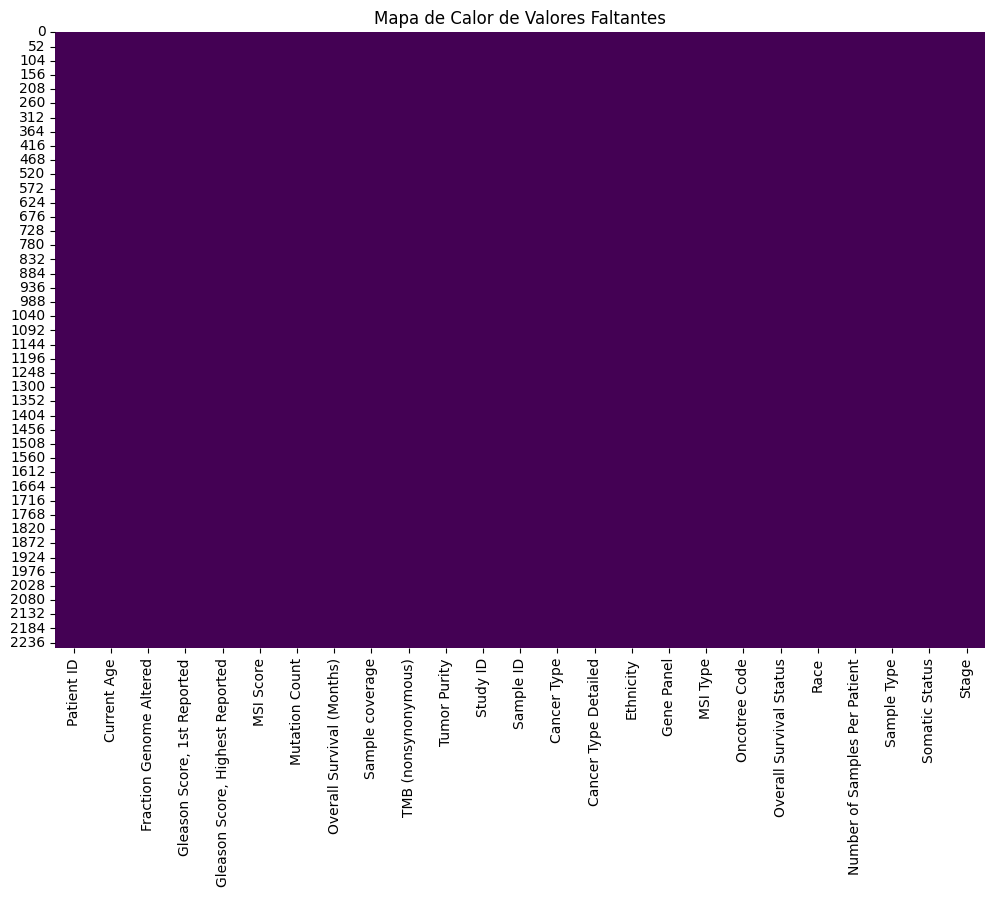

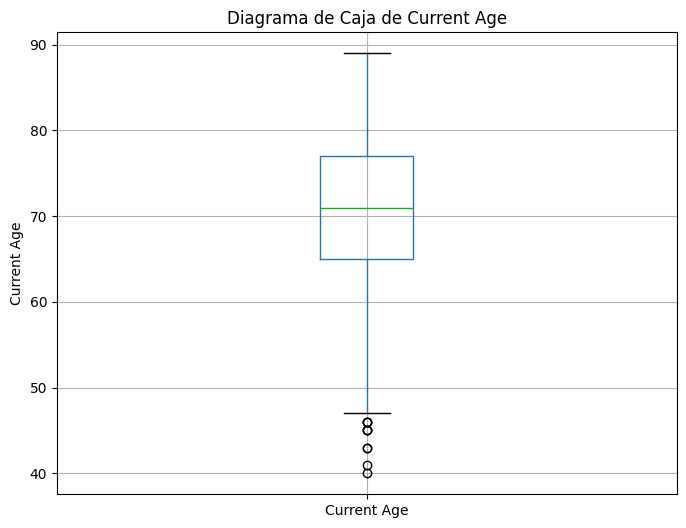

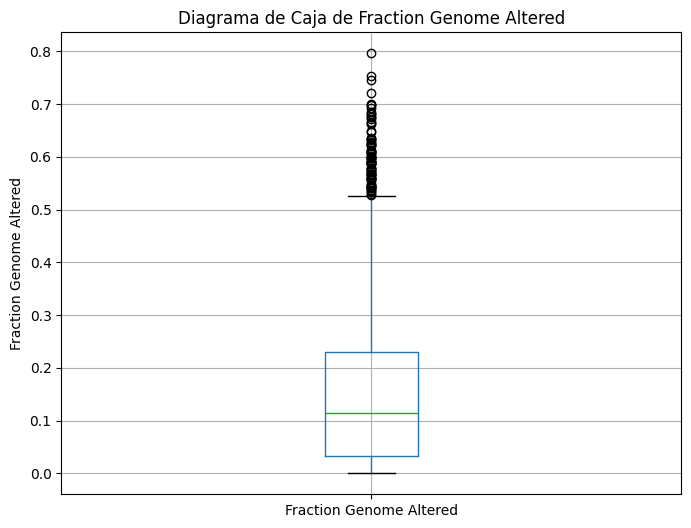

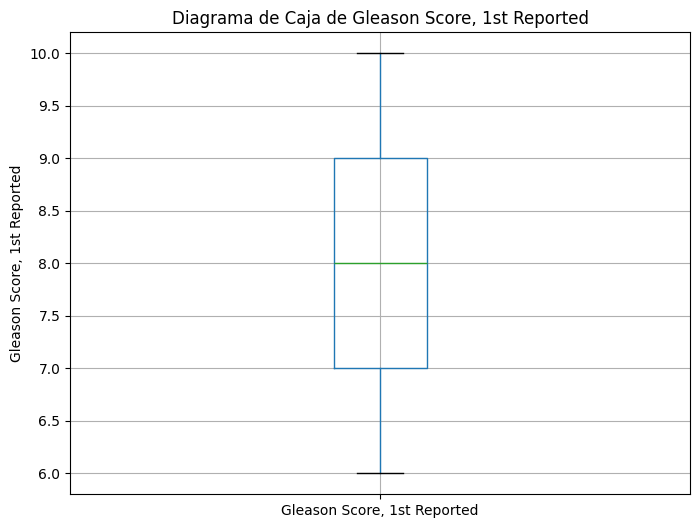

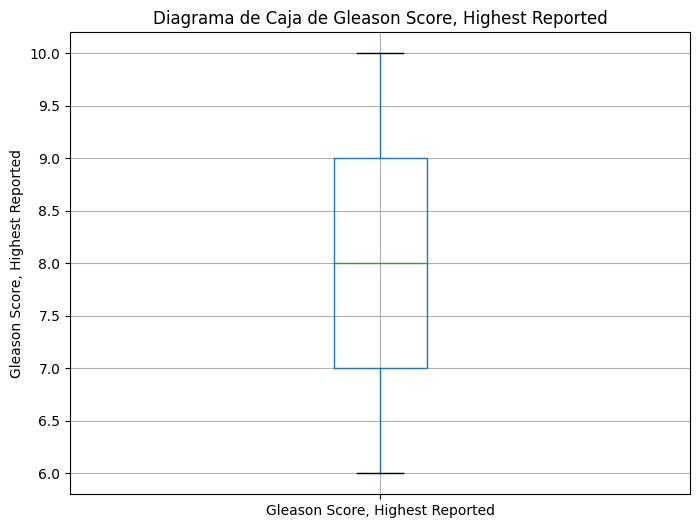

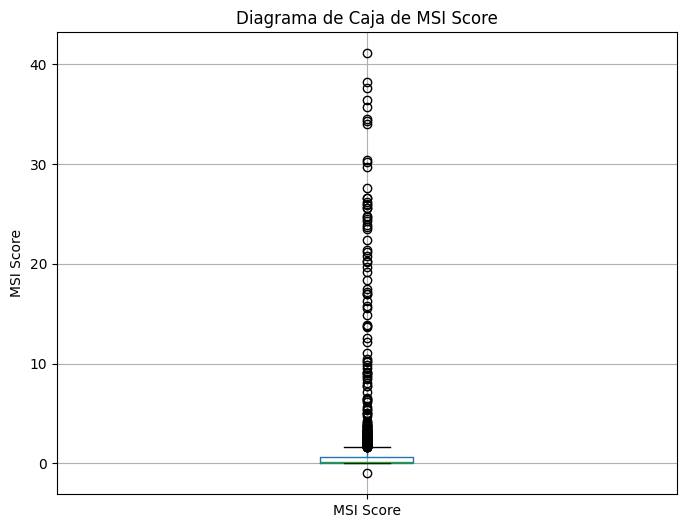

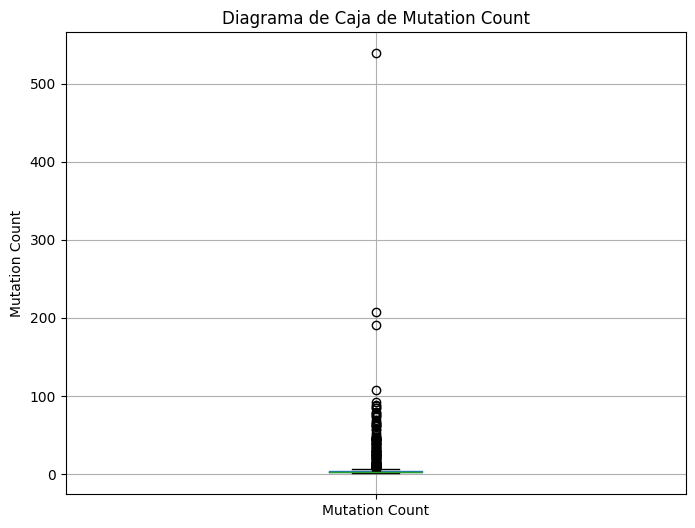

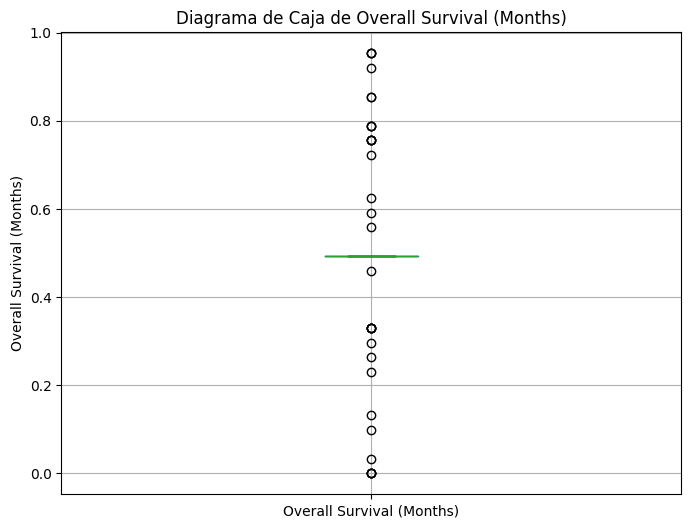

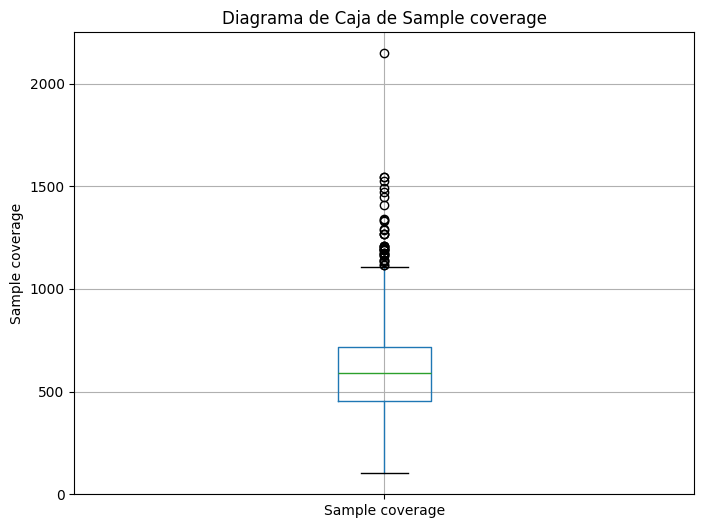

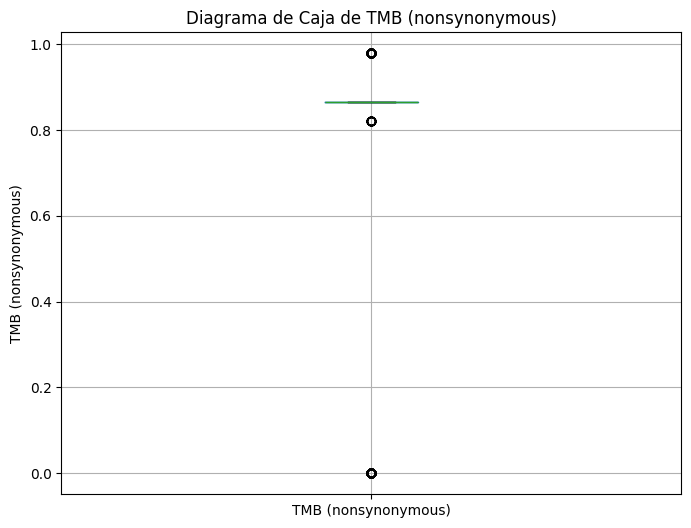

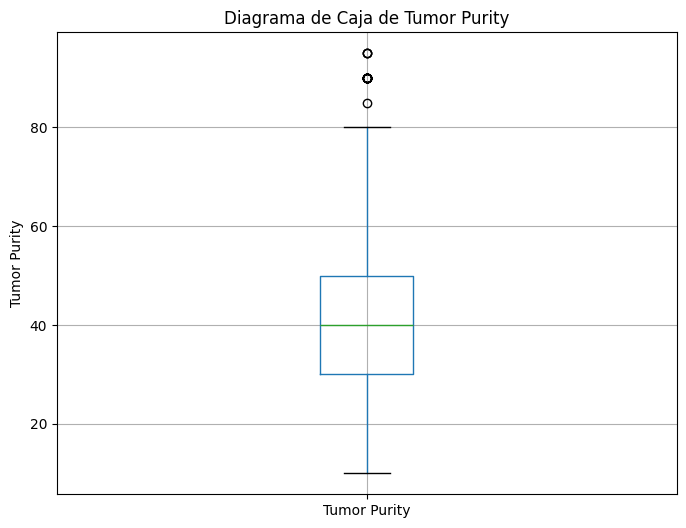

In [24]:
# Crear un mapa de calor de valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(df_final.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de Calor de Valores Faltantes")
plt.show()

# Seleccionar columnas numéricas para diagramas de caja basadas en la salida de describe() y el interés potencial
numerical_cols_for_boxplot = [
    'Current Age',
    'Fraction Genome Altered',
    'Gleason Score, 1st Reported',
    'Gleason Score, Highest Reported',
    'MSI Score',
    'Mutation Count',
    'Overall Survival (Months)',
    'Sample coverage',
    'TMB (nonsynonymous)',
    'Tumor Purity'
]

# Crear diagramas de caja para las columnas numéricas seleccionadas
for col in numerical_cols_for_boxplot:
    plt.figure(figsize=(8, 6))
    df_final.boxplot(column=col)
    plt.title(f"Diagrama de Caja de {col}")
    plt.ylabel(col)
    plt.show()


## Diagramas de Caja del Dataset Limpio



In [ ]:
# Crear diagramas de caja para las columnas numéricas seleccionadas
for col in numerical_cols_for_boxplot:
    plt.figure(figsize=(8, 6))
    df_final.boxplot(column=col)
    plt.title(f"Diagrama de Caja de {col}")
    plt.ylabel(col)
    plt.show()

In [ ]:
# Calculamos la matriz de correlación para las variables numéricas
matriz_correlacion = df.corr(numeric_only=True) # Solo variables numéricas

# Creamos un mapa de calor
plt.figure(figsize=(8, 6)) # Ajustamos el tamaño del gráfico
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación de Variables Numéricas', fontsize=16)
plt.show()

In [ ]:
# Elegimos el set de datos con el que vamos a trabajar
#df_subset = df_final[["TMB (nonsynonymous)", "Cancer Type Detailed","Ethnicity","Cancer Type","MSI Score", "Overall Survival Status","Mutation Count","Current Age","Tumor Purity" ]]

print("\nGenerando Pair Plot...")
# Usando  df_subset que incluye 'Overall Survival Status'
sns.pairplot(df, hue='Overall Survival Status', diag_kind='kde')
plt.suptitle('Pair Plot de Datos de XXXX', y=1.02) # Título general
plt.show()
print("Pair Plot generado.")

In [ ]:
# Convertir variables categóricas en variables dummy (One-Hot Encoding)
# 'drop_first=True' evita la multicolinealidad perfecta (trampa de la variable dummy)

# Identificadores y campos que NO queremos codificar (ni usar como predictores)
id_like = ["Study ID", "Patient ID", "Sample ID"]
TARGET = "Overall Survival (Months)" # Definir la variable objetivo

# Seleccionar columnas categóricas (tipo 'object' tras la coerción numérica)
# Excluimos identificadores del one-hot y del target
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
categoricas = [c for c in categoricas if c not in id_like and c != TARGET]

datos_cancer = pd.get_dummies(df.drop(columns=id_like, errors="ignore"),
                              columns=categoricas, drop_first=True)


print("Datos después de crear variables dummy:")
display(datos_cancer.head())

# Definir la variable dependiente (Y) y las variables independientes (X)
# Asegurarse de que la columna TARGET exista en datos_cancer antes de intentar eliminarla
if TARGET in datos_cancer.columns:
  X = datos_cancer.drop(TARGET, axis=1) # Todas las columnas excepto la variable objetivo
  Y = datos_cancer[TARGET] # Solo la columna objetivo
else:
  print(f"Error: La columna objetivo '{TARGET}' no se encuentra en el DataFrame 'datos_cancer'.")
  X = None
  Y = None


if X is not None and Y is not None:
  print(f"\nNúmero de variables predictoras (X): {X.shape[1]}")
  print(f"Nombres de las variables predictoras (primeras 20): {X.columns.tolist()[:20]}")

In [ ]:
path = "/content/prostate_msk_2024_clinical_data (2).tsv"
# Variable objetivo
TARGET = "Overall Survival (Months)"

# Columnas que son numéricas o que conviene forzar a numéricas
force_numeric = [
    "Current Age",
    "Fraction Genome Altered",
    "Gleason Score, 1st Reported",
    "Gleason Score, Highest Reported",
    "MSI Score",
    "Mutation Count",
    "Overall Survival (Months)",
    "Progression Free Survival Status (months)",
    "TMB (nonsynonymous)",
    "Tumor Purity",
    "Sample coverage",
    "Number of Samples Per Patient",
]

# Identificadores y campos que NO queremos codificar (ni usar como predictores)
id_like = ["Study ID", "Patient ID", "Sample ID"]

#  Carga
df = pd.read_csv(path, sep="\t", low_memory=False)

#  Tipos: forzar numéricos donde aplique (ignora los que no existan)
for col in force_numeric:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

#  Comprobación del objetivo
if TARGET not in df.columns:
    raise ValueError(f"La columna objetivo '{TARGET}' no existe en el dataset. "
                     f"Disponibles: {sorted(df.columns.tolist())[:10]} ...")

# No podemos predecir si el objetivo es todo NaN: eliminamos filas sin Y
df = df.dropna(subset=[TARGET])

# Selección de columnas categóricas (tipo 'object' tras la coerción numérica)
# Excluimos identificadores del one-hot y de X
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
categoricas = [c for c in categoricas if c not in id_like and c != TARGET]

#  One-Hot Encoding con drop_first para evitar multicolinealidad perfecta
datos_modelo = pd.get_dummies(df.drop(columns=id_like, errors="ignore"),
                              columns=categoricas, drop_first=True)

# Imputar valores faltantes en columnas numéricas con la mediana después de one-hot encoding
for col in datos_modelo.select_dtypes(include=['float64', 'int64']).columns:
    datos_modelo[col] = datos_modelo[col].fillna(datos_modelo[col].median())

print("Datos después de crear variables dummy e imputar faltantes:")
print(datos_modelo.head())

#  Definir X e Y
X = datos_modelo.drop('Overall Survival (Months)', axis=1) # Todas las columnas excepto 'precio_usd'
Y = datos_modelo['Overall Survival (Months)'] # Solo la columna 'precio_usd'

print(f"\nFilas: {datos_modelo.shape[0]:,} | Columnas: {datos_modelo.shape[1]:,}")
print(f"Número de variables predictoras (X): {X.shape[1]}")
print(f"Nombres de las variables predictoras (primeras 20): {X.columns.tolist()[:20]}")

In [ ]:
!pip install statsmodels
import statsmodels.api as sm
import numpy as np

# Convert boolean columns to integers (0s and 1s)
# statsmodels is strict and does not always accept booleans
for col in X.columns:
    if X[col].dtype == bool:
        X[col] = X[col].astype(int)

# Remove the column with all NaN values
if 'Progression Free Survival Status (months)' in X.columns:
    X = X.drop(columns=['Progression Free Survival Status (months)'])


# Now the DataFrame X has only numerical types (int and float)
# You can verify it with X.info() if you want
print("Nuevos tipos de datos de X después de la conversión:")
print(X.info())

# Añadir una constante a X para el intercepto (beta_0) del modelo
X = sm.add_constant(X)

# Check the data types of your predictor variables
print("Data types of X:")
print(X.info())

# Check the data type of your response variable
print("\nData type of Y:")
print(Y.info())

# Crear y ajustar el modelo de regresión lineal
modelo = sm.OLS(Y, X, missing='drop').fit() # Added missing='drop' to handle NaNs in X

# Mostrar el resumen del modelo
print("\nResumen del Modelo de Regresión Lineal Múltiple:")
print(modelo.summary())

## Interpretación del Modelo de Regresión Lineal (statsmodels)

### R-squared (R²)
- **Valor:** 0.429
- **Interpretación:** Aproximadamente el 42.9% de la varianza en la variable dependiente (`Overall Survival (Months)`) es explicada por las variables predictoras incluidas en el modelo.

### Adj. R-squared (R² ajustado)
- **Valor:** 0.417
- **Interpretación:** Similar al R², pero ajustado por el número de predictores. Es útil para comparar modelos con diferente número de variables.

### F-statistic y Prob (F-statistic)
- **F-statistic:** 37.68
- **Prob (F-statistic):** 1.53e-227 (un p-valor muy bajo)
- **Interpretación:** El p-valor extremadamente bajo (< 0.05) indica que el modelo en su conjunto es estadísticamente significativo. Esto significa que al menos una de las variables predictoras tiene un efecto lineal significativo en `Overall Survival (Months)`.

### Coeficientes (coef)
- **Interpretación:** Representan el cambio promedio en `Overall Survival (Months)` por cada unidad de cambio en la variable predictora correspondiente, manteniendo las demás variables constantes.
- **const (Intercepto):** 111.6043. Es el valor esperado de `Overall Survival (Months)` cuando todas las variables numéricas son cero y las variables categóricas están en su categoría de referencia.

**Ejemplos de interpretación de coeficientes (basado en el output):**
- `Current Age`: -0.7401. Por cada año adicional de edad, la supervivencia general disminuye en aproximadamente 0.7401 meses.
- `Fraction Genome Altered`: -32.0749. Un aumento en la fracción del genoma alterado se asocia con una disminución significativa en la supervivencia general.
- `Overall Survival Status_1:DECEASED`: -64.5861. Estar en estado 'DECEASED' se asocia, como era de esperar, con una menor supervivencia general en comparación con 'LIVING'.
- `TMB (nonsynonymous)`: -0.1044. Un aumento en la carga mutacional del tumor (TMB) se asocia con una ligera disminución en la supervivencia general.

### p-valor (P>|t|)
- **Interpretación:** Indica la significancia estadística de cada predictor individual. Si el p-valor es bajo (comúnmente < 0.05), el coeficiente estimado es estadísticamente diferente de cero. Busca p-valores bajos para identificar los predictores más importantes.

### Intervalo de confianza [0.025, 0.975]
- **Interpretación:** El rango en el que se espera que esté el valor verdadero del coeficiente el 95% de las veces. Si el intervalo no incluye 0, el coeficiente es estadísticamente significativo al nivel del 5%.

**Conclusión:** El modelo es globalmente significativo y las variables con p-valores bajos son predictores importantes de la supervivencia general en este conjunto de datos. El R² indica que el modelo explica una parte considerable de la variabilidad, lo cual es valioso en un contexto clínico.

## Parte 3: Diagnóstico de Regresión y Problemas Comunes
Un buen modelo no solo tiene un buen R², sino que también cumple ciertos supuestos.

### 3.1 Análisis de Multicolinealidad (VIF)
La multicolinealidad ocurre cuando dos o más variables predictoras están altamente correlacionadas entre sí, lo que dificulta la interpretación de los coeficientes individuales.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd # Import pandas

# Select only numerical columns and drop any remaining non-finite values
X_numeric = X.select_dtypes(include=np.number).dropna()

# Check if the resulting DataFrame is empty
if X_numeric.empty:
    print("Error: El DataFrame X_numeric está vacío después de eliminar valores no finitos.")
else:
    # Convert boolean columns to integers (0s and 1s) for VIF calculation (should be handled by select_dtypes but as a safeguard)
    X_vif = X_numeric.copy() # Create a copy
    for col in X_vif.columns:
        if X_vif[col].dtype == bool:
            X_vif[col] = X_vif[col].astype(int)


    # Add a constant to X_vif for the intercept (beta_0) of the VIF model
    X_vif = sm.add_constant(X_vif)

    # Calculamos VIF para cada variable predictora
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_vif.columns

    # Calculate VIF, handling potential inf values
    vif_values = []
    for i in range(X_vif.shape[1]):
        try:
            vif = variance_inflation_factor(X_vif.values, i)
            vif_values.append(vif)
        except Exception as e:
            # If VIF calculation fails (probablemente debido a multicolinealidad perfecta), asignar infinito
            vif_values.append(np.inf)
            print(f"Advertencia: No se pudo calcular el VIF para la columna {X_vif.columns[i]} debido a multicolinealidad perfecta.")

    vif_data["VIF"] = vif_values

    # Identify features with infinite VIF
    infinite_vif_features = vif_data[vif_data['VIF'] == np.inf]['feature'].tolist()

    # Remove features with infinite VIF from a copy of X for recalculation
    X_vif_reduced = X_vif.drop(columns=infinite_vif_features)

    print(f"\nVariables con VIF infinito (eliminadas para el recálculo): {infinite_vif_features}")

    # Recalculate VIF for the reduced set of variables
    if X_vif_reduced.shape[1] > 0:
        vif_data_reduced = pd.DataFrame()
        vif_data_reduced["feature"] = X_vif_reduced.columns
        vif_data_reduced["VIF"] = [variance_inflation_factor(X_vif_reduced.values, i) for i in range(X_vif_reduced.shape[1])]

        # Excluir el VIF del intercepto (const)
        vif_data_reduced = vif_data_reduced[vif_data_reduced['feature'] != 'const']

        print("\nFactores de Inflación de la Varianza (VIF) para variables restantes:")
        print(vif_data_reduced.sort_values(by='VIF', ascending=False))
    else:
        print("\nNo quedan variables después de eliminar aquellas con VIF infinito.")

#### Interpretación del VIF:

* VIF < 5: Generalmente aceptable.

* 5 < VIF < 10: Podría ser problemático, requiere atención.

* VIF > 10: Indica alta multicolinealidad. Deberías considerar eliminar una de las variables correlacionadas o combinarlas.

En nuestro ejemplo: Si kilometraje_km y antiguedad_años tienen un VIF alto, es porque son muy redundantes. Tiene sentido: un auto más viejo suele tener más kilómetros.

### 3.2 Diagnóstico de Supuestos: Residuos
Los residuos (los errores de predicción) nos dicen mucho sobre la calidad de nuestro modelo.

In [ ]:
# Obtener los residuos del modelo
residuos = modelo.resid

# Obtener los valores predichos
valores_predichos = modelo.fittedvalues

# 1. Homocedasticidad (varianza constante de los errores)
# Gráfico de Residuos vs. Valores Predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=valores_predichos, y=residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Predichos (Homocedasticidad)", fontsize=16)
plt.show()

# 2. Normalidad de los Residuos
# Histograma de Residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos (Normalidad)", fontsize=16)
plt.show()

# Gráfico Q-Q para la Normalidad de los Residuos
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Residuos (Normalidad)", fontsize=16)
plt.show()

In [ ]:
# Ejemplo de transformación logarítmica de la variable dependiente
# Si la variable objetivo está sesgada positivamente y/o hay heterocedasticidad

# Creamos una nueva columna con el logaritmo de la variable objetivo (usando log1p para manejar el 0)
# Usamos el DataFrame 'datos_modelo' que ya está preparado (one-hot encoding e imputación)
datos_modelo['log_Overall_Survival_Months'] = np.log1p(datos_modelo[TARGET])

# Definimos la nueva variable dependiente transformada
Y_log = datos_modelo['log_Overall_Survival_Months']

# Usamos las mismas variables predictoras (X) definidas anteriormente
# Asegurarnos de que X no tenga la columna original de Overall Survival (Months)
X_model = datos_modelo.drop([TARGET, 'log_Overall_Survival_Months'], axis=1, errors='ignore')


# Convertir las columnas booleanas a enteros (0s y 1s) en X_model si aún existen
for col in X_model.columns:
    if X_model[col].dtype == bool:
        X_model[col] = X_model[col].astype(int)

# Añadir una constante a X_model para el intercepto (beta_0) del modelo
X_model = sm.add_constant(X_model)

# Eliminar columnas en X_model que puedan haber resultado con todos NaNs o Infinitos después de transformaciones si las hubiera
# Aunque con log1p en Y y imputación en X, esto es menos probable, es una buena práctica de verificación
X_model = X_model.dropna(axis=1, how='all')
X_model = X_model.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='all')


# Crear y ajustar el modelo de regresión lineal con la variable objetivo transformada
# Usamos missing='drop' aunque ya imputamos, para estar seguros
modelo_log = sm.OLS(Y_log, X_model, missing='drop').fit()

print("\nResumen del Modelo con Logaritmo de Overall Survival (Months):")
print(modelo_log.summary())

# Volvemos a chequear los residuos para el modelo transformado
residuos_log = modelo_log.resid
valores_predichos_log = modelo_log.fittedvalues

# Gráfico de Residuos vs. Valores Predichos para el modelo LOG
plt.figure(figsize=(10, 6))
sns.scatterplot(x=valores_predichos_log, y=residuos_log)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Predichos (Log)")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Predichos (Modelo LOG)", fontsize=16)
plt.show()

# Histograma de Residuos para el modelo LOG
plt.figure(figsize=(10, 6))
sns.histplot(residuos_log, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos (Modelo LOG)", fontsize=16)
plt.show()

# Gráfico Q-Q para la Normalidad de los Residuos para el modelo LOG
plt.figure(figsize=(10, 6))
stats.probplot(residuos_log, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Residuos (Modelo LOG)", fontsize=16)
plt.show()